In [1]:
import pandas as pd

from Models.Pairs.Feature_engineering.dependences import DependenciesPlots
from Models.Pairs.Feature_engineering.model_explainer import ExplainModel
from Models.Pairs.Hyperparameters.optuna_hyperparameters import OptunaXgboost
from Models.Pairs.pairs_xgboost_model import TrainXgBoost
from Models.variables import PAIRS_DATASET


def create_model(data, hyperparameters=False):
    created_model = TrainXgBoost(data, test_range=[2024], hyperparameters=hyperparameters, prints=True, plots=False, details=False)
    created_model.create_classification_model()
    created_model.evaluate_classification()

    return created_model

def run_optuna(data, number_of_runs=5):
    results = list()
    for i in range(number_of_runs):
        hyper = OptunaXgboost(data, prints=False, accuracy_threshold=0.709)

        results.append([i + 1, hyper, hyper.pairs, hyper.accuracy, hyper.accuracy_with_bonuses, hyper.optuna_results])
        print(results[-1][:-1])

    df = pd.DataFrame(data=results, columns=['Run', 'Model', 'Pairs_accuracy', 'Accuracy', 'Accuracy_with_bonuses', 'Optuna_results'])
    df = df.sort_values(by=['Accuracy_with_bonuses'], ascending=False).reset_index(drop=True)

    df = df.loc[0,:]
    print(df['Accuracy_with_bonuses'])

    return df


def amended_dataset_test(data, tested_features, optuna_runs):
    create_model(data)
    tuned_model = run_optuna(data, optuna_runs)
    dependence_plots = DependenciesPlots(trained_model=tuned_model['Model'], features_to_plot=tested_features)

    for dp in dependence_plots.dependencies_plots:
        dp.show()

    model_explainer = ExplainModel(tuned_model['Model'])
    model_explainer.importances_heatmap.show()
    model_explainer.permutation_importance.show()

Elapsed time: 1.11s
Classification accuracy (plain pairs): 68.648% (8014/11674)
Classification accuracy (summed pairs): 42.268% (1692/4003)
Classification accuracy: 42.843% (1715/4003)
Classification accuracy (with bonuses): 47.339% (1895/4003)


[I 2025-05-23 17:57:43,384] A new study created in memory with name: no-name-b4ecfbb9-e529-400a-9157-528b14bc8fb2


  0%|          | 0/200 [00:00<?, ?it/s]

[1, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C3A5BE0>, 0.7100394038033236, 0.447414439170622, 0.490382213339995]


  0%|          | 0/200 [00:00<?, ?it/s]

[2, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C7C5A60>, 0.7100394038033236, 0.44066949787659254, 0.48413689732700477]


  0%|          | 0/200 [00:00<?, ?it/s]

[3, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C64A7E0>, 0.7103820455713552, 0.4436672495628279, 0.48913315013739694]
0.490382213339995
Creating explainer...
Proceeding to dependencies...
Proceeding to plotting...
Proceeding to importance metrics...
Proceeding to shap summary...
Proceeding to permutations...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.importances_heatmap.show()
C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.permutation_importance.show()


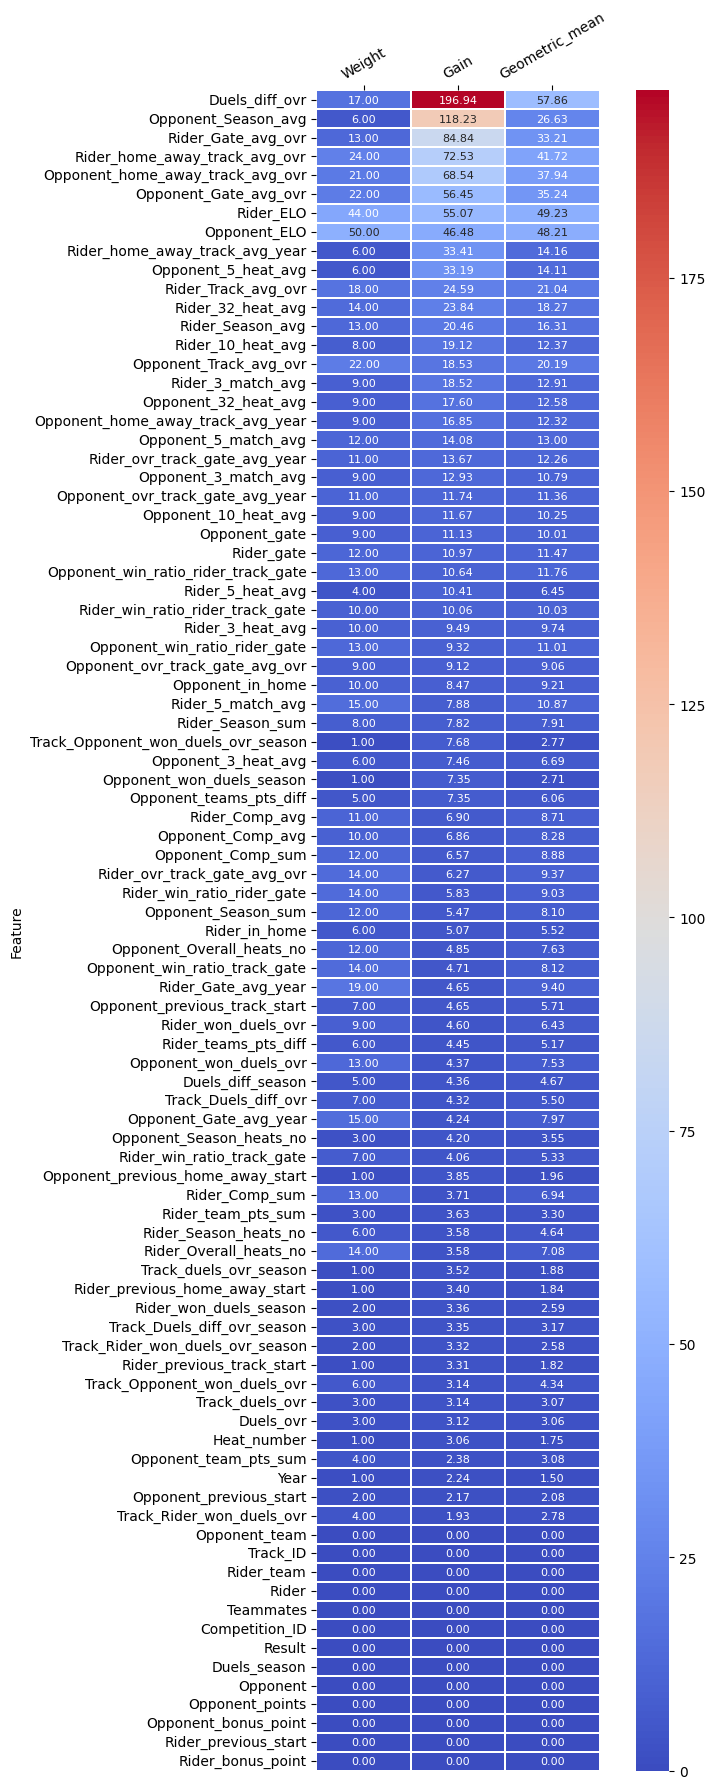

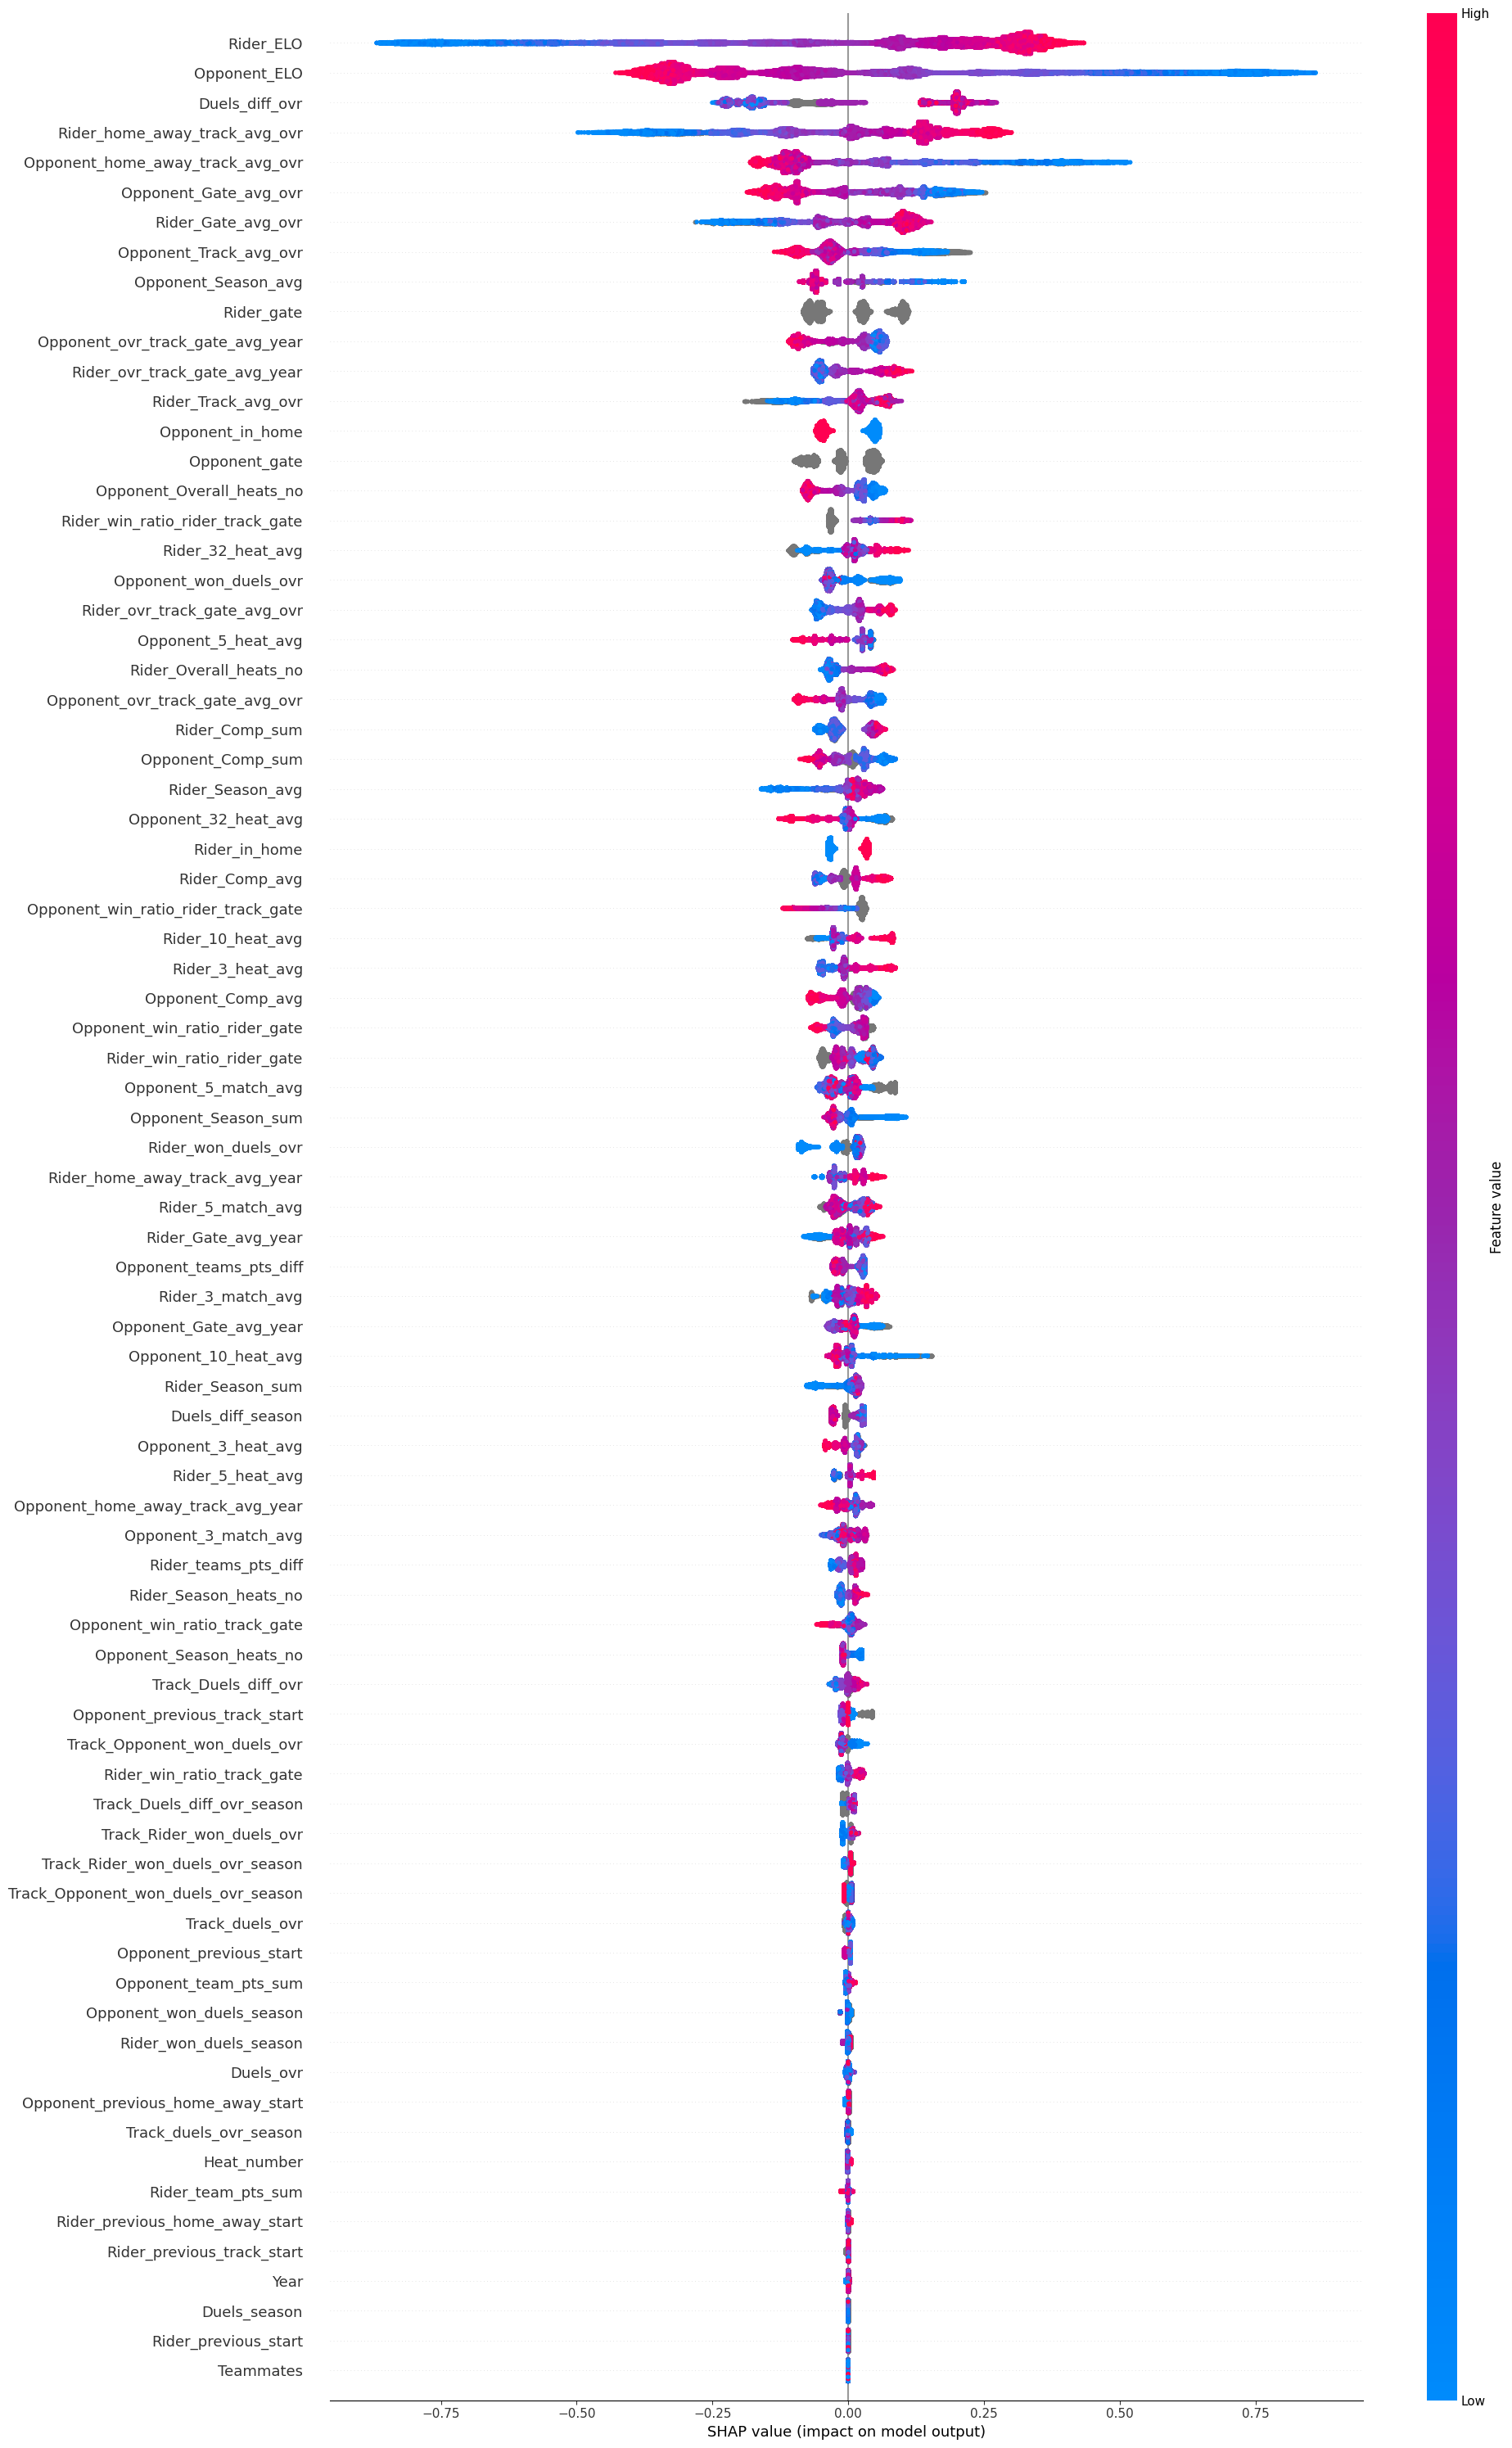

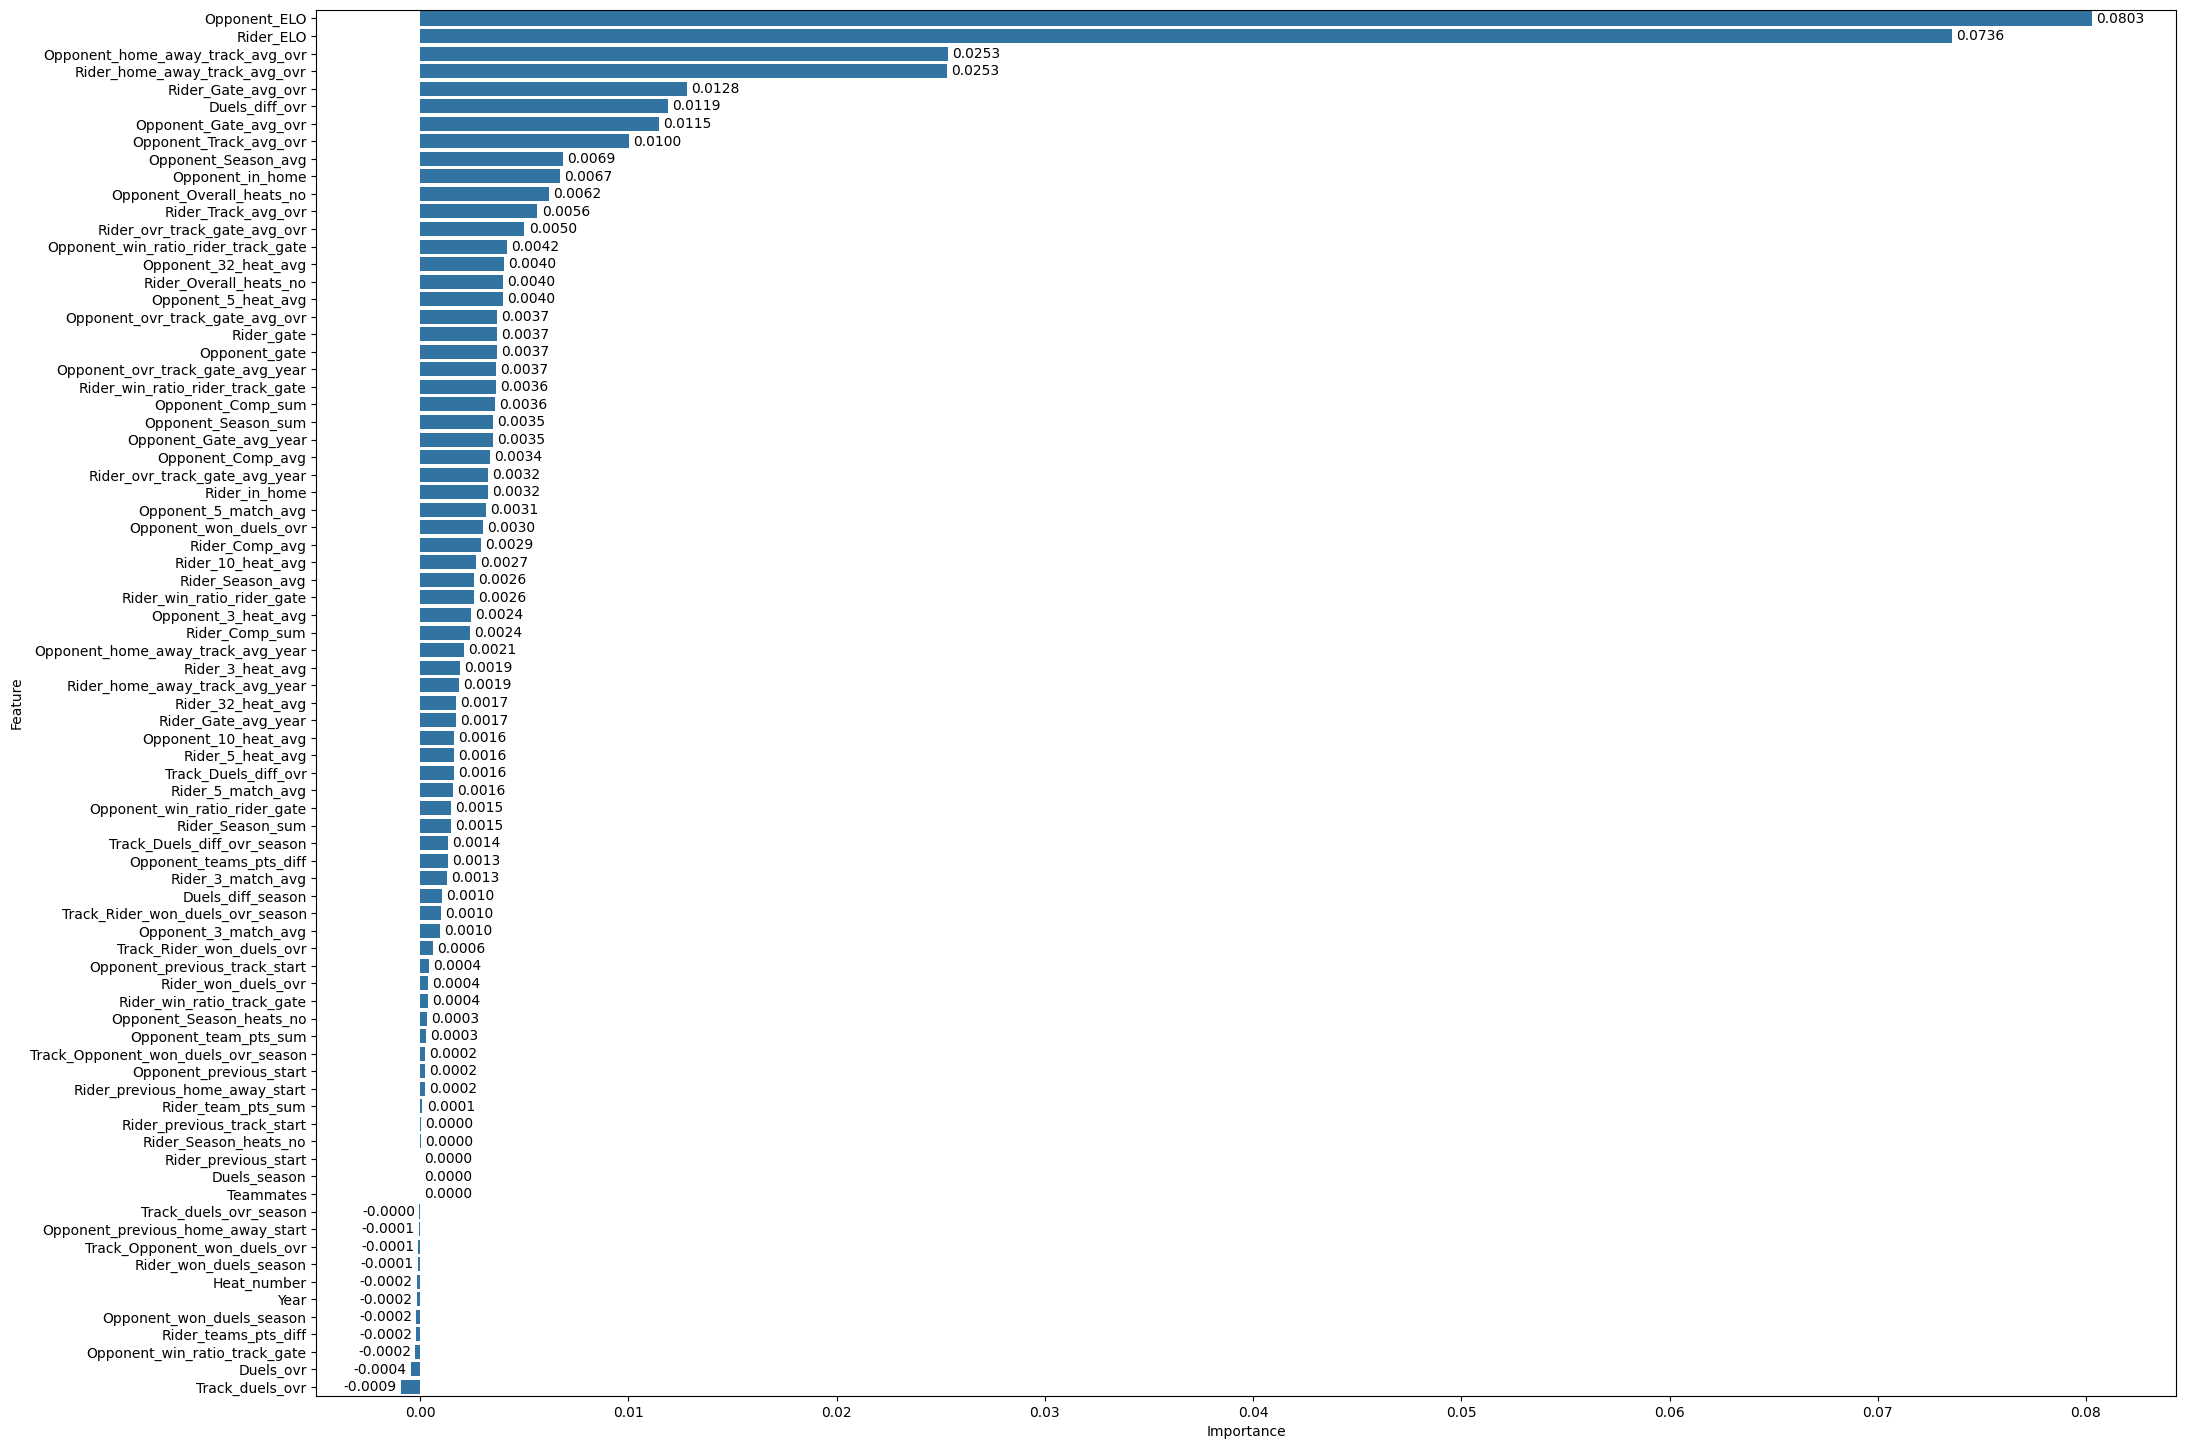

In [3]:
# Creating base model for benchmark 
dataset = pd.read_parquet(f"../../../../Dataset/Datasets/{PAIRS_DATASET}")
amended_dataset_test(dataset, [], 3)

Elapsed time: 1.11s
Classification accuracy (plain pairs): 68.751% (8026/11674)
Classification accuracy (summed pairs): 42.193% (1689/4003)
Classification accuracy: 43.367% (1736/4003)
Classification accuracy (with bonuses): 47.614% (1906/4003)


  0%|          | 0/200 [00:00<?, ?it/s]

[1, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C598200>, 0.7100394038033236, 0.45066200349737695, 0.4936297776667499]


  0%|          | 0/200 [00:00<?, ?it/s]

[2, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C42B620>, 0.7096111015932842, 0.4441668748438671, 0.4876342742942793]


  0%|          | 0/200 [00:00<?, ?it/s]

[3, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x0000026588049A30>, 0.7114956313174576, 0.44616537596802397, 0.4901324006994754]


  0%|          | 0/200 [00:00<?, ?it/s]

[4, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x00000265EF40BA40>, 0.7102107246873394, 0.4449163127654259, 0.49288033974519113]


  0%|          | 0/200 [00:00<?, ?it/s]

[5, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C3A5BE0>, 0.7086688367311975, 0.4449163127654259, 0.48938296277791654]
0.4936297776667499
Creating explainer...
Proceeding to dependencies...
Proceeding to plotting...
Creating 1/3 batch of plots...


C:\Users\Piotr\PycharmProjects\SpeedwayHub\venv\Lib\site-packages\shap\plots\_scatter.py:449: RuntimeWarning: invalid value encountered in greater
  min_dist = np.min(diffs[diffs > 1e-8])
C:\Users\Piotr\PycharmProjects\SpeedwayHub\venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Creating 2/3 batch of plots...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dp.show()


Proceeding to importance metrics...
Proceeding to shap summary...
Proceeding to permutations...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.importances_heatmap.show()
C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.permutation_importance.show()


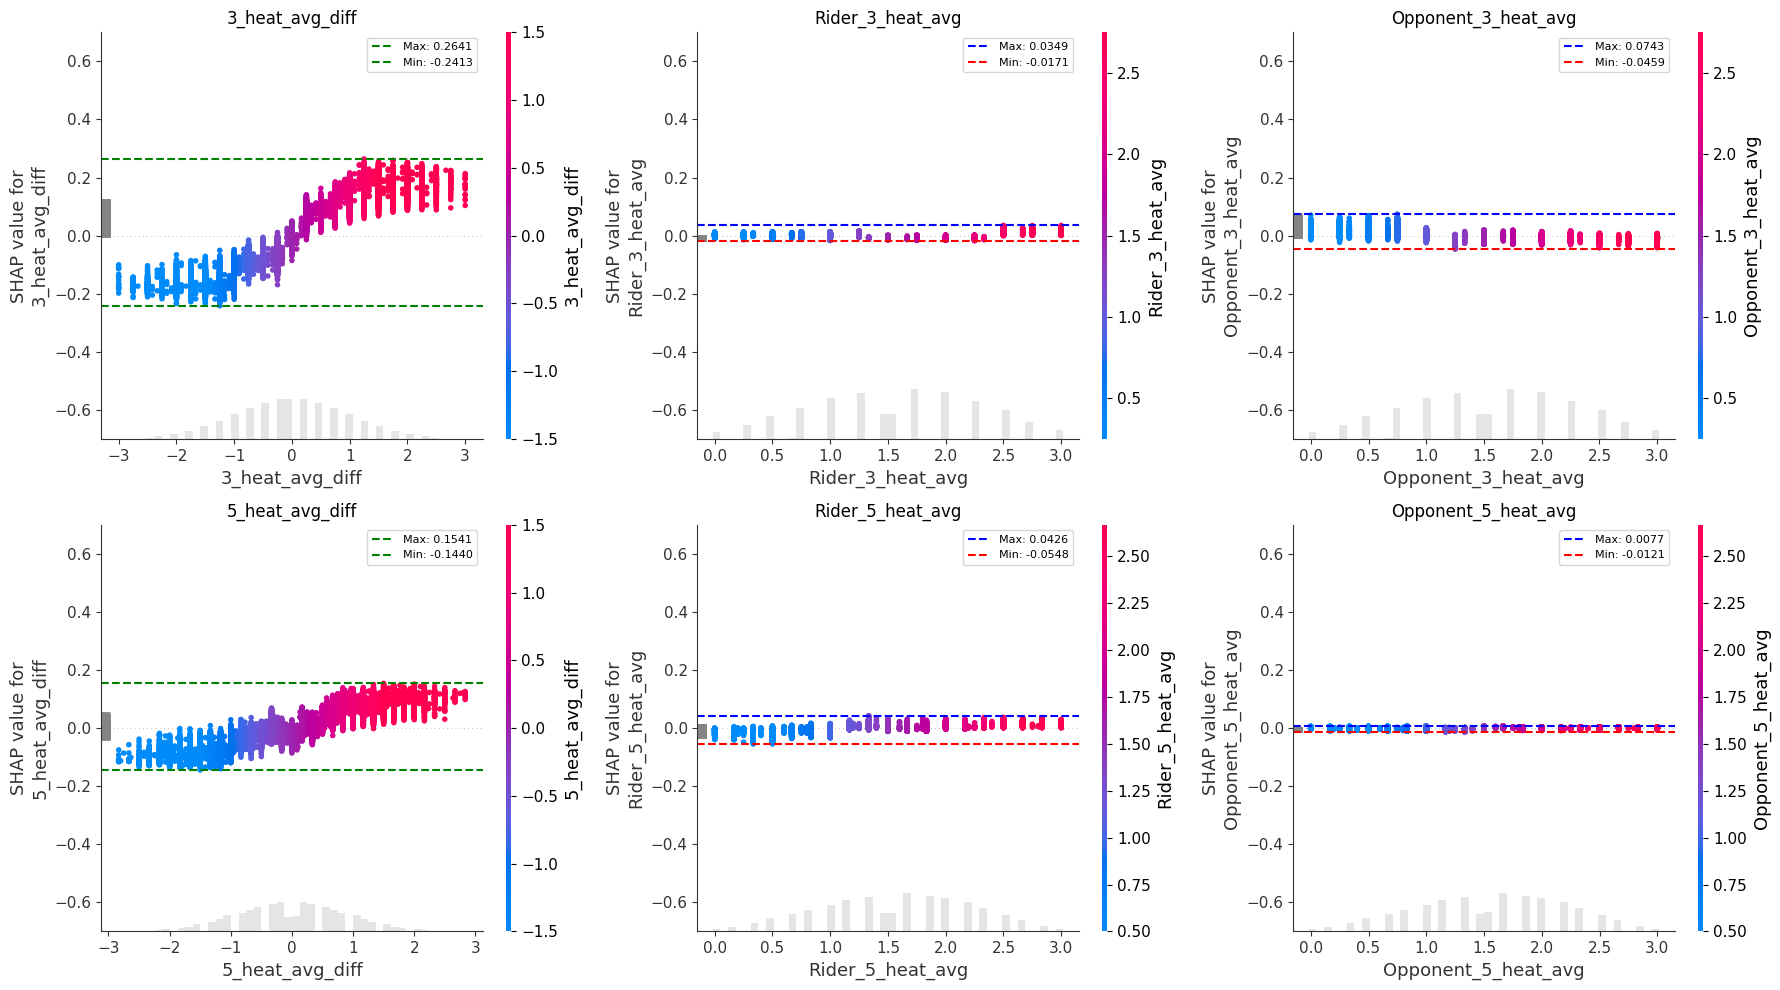

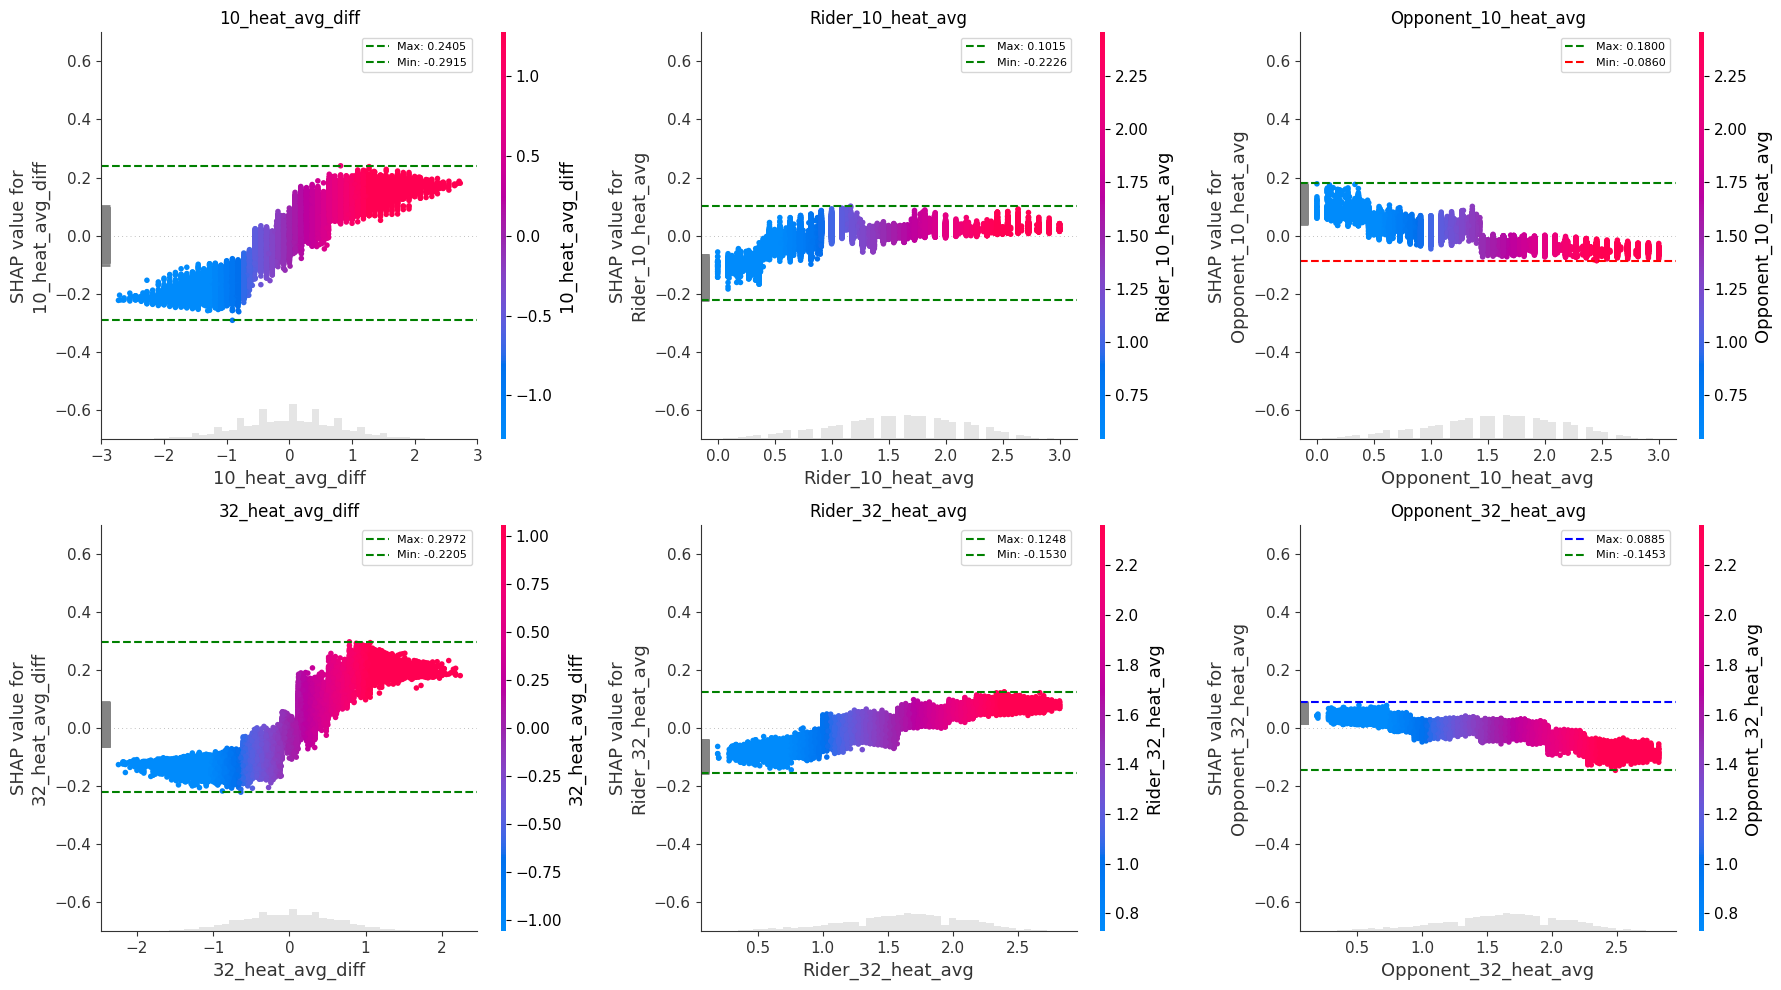

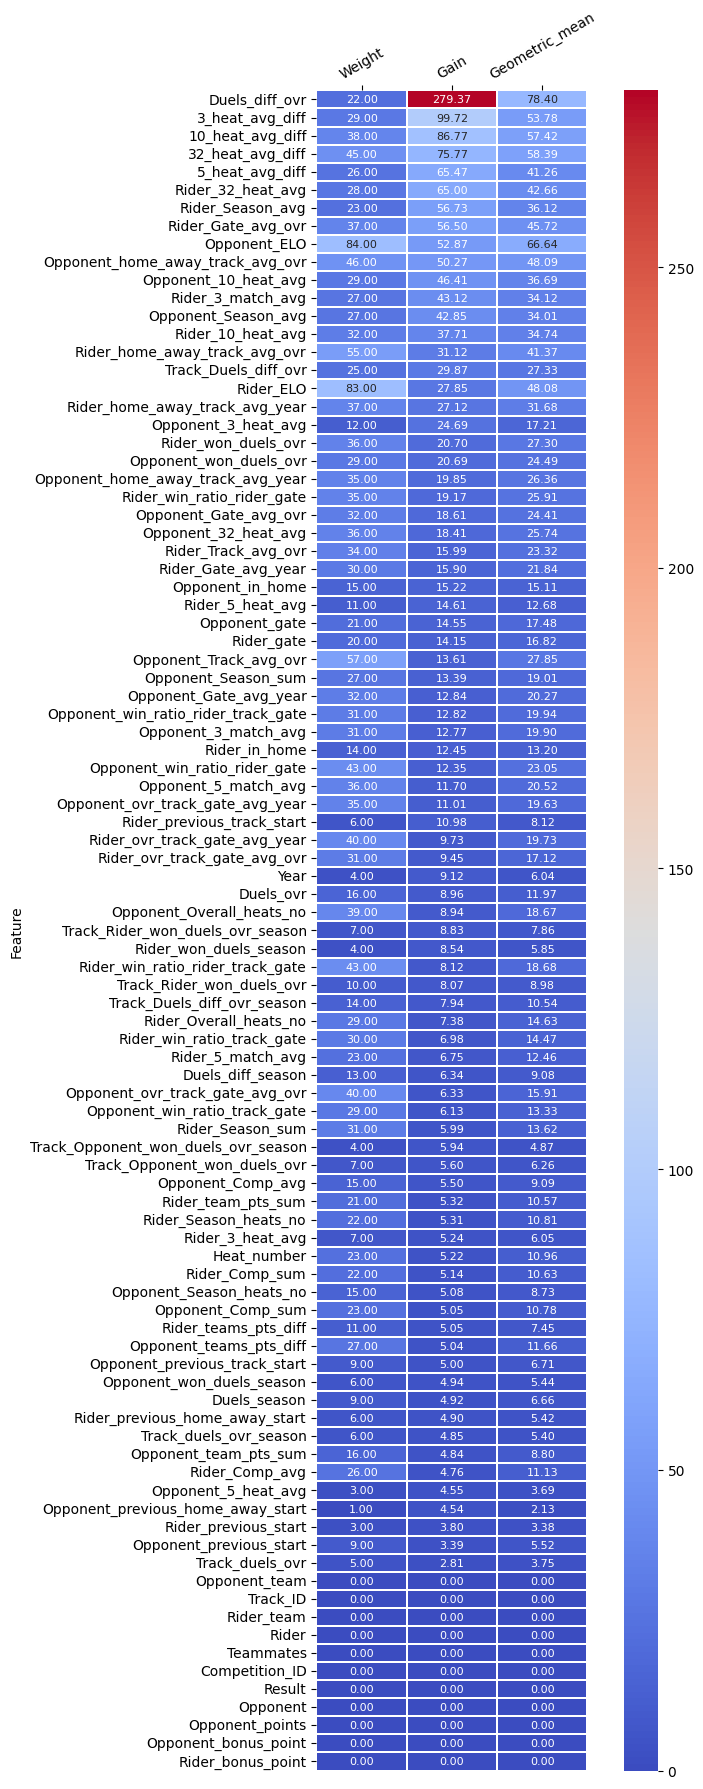

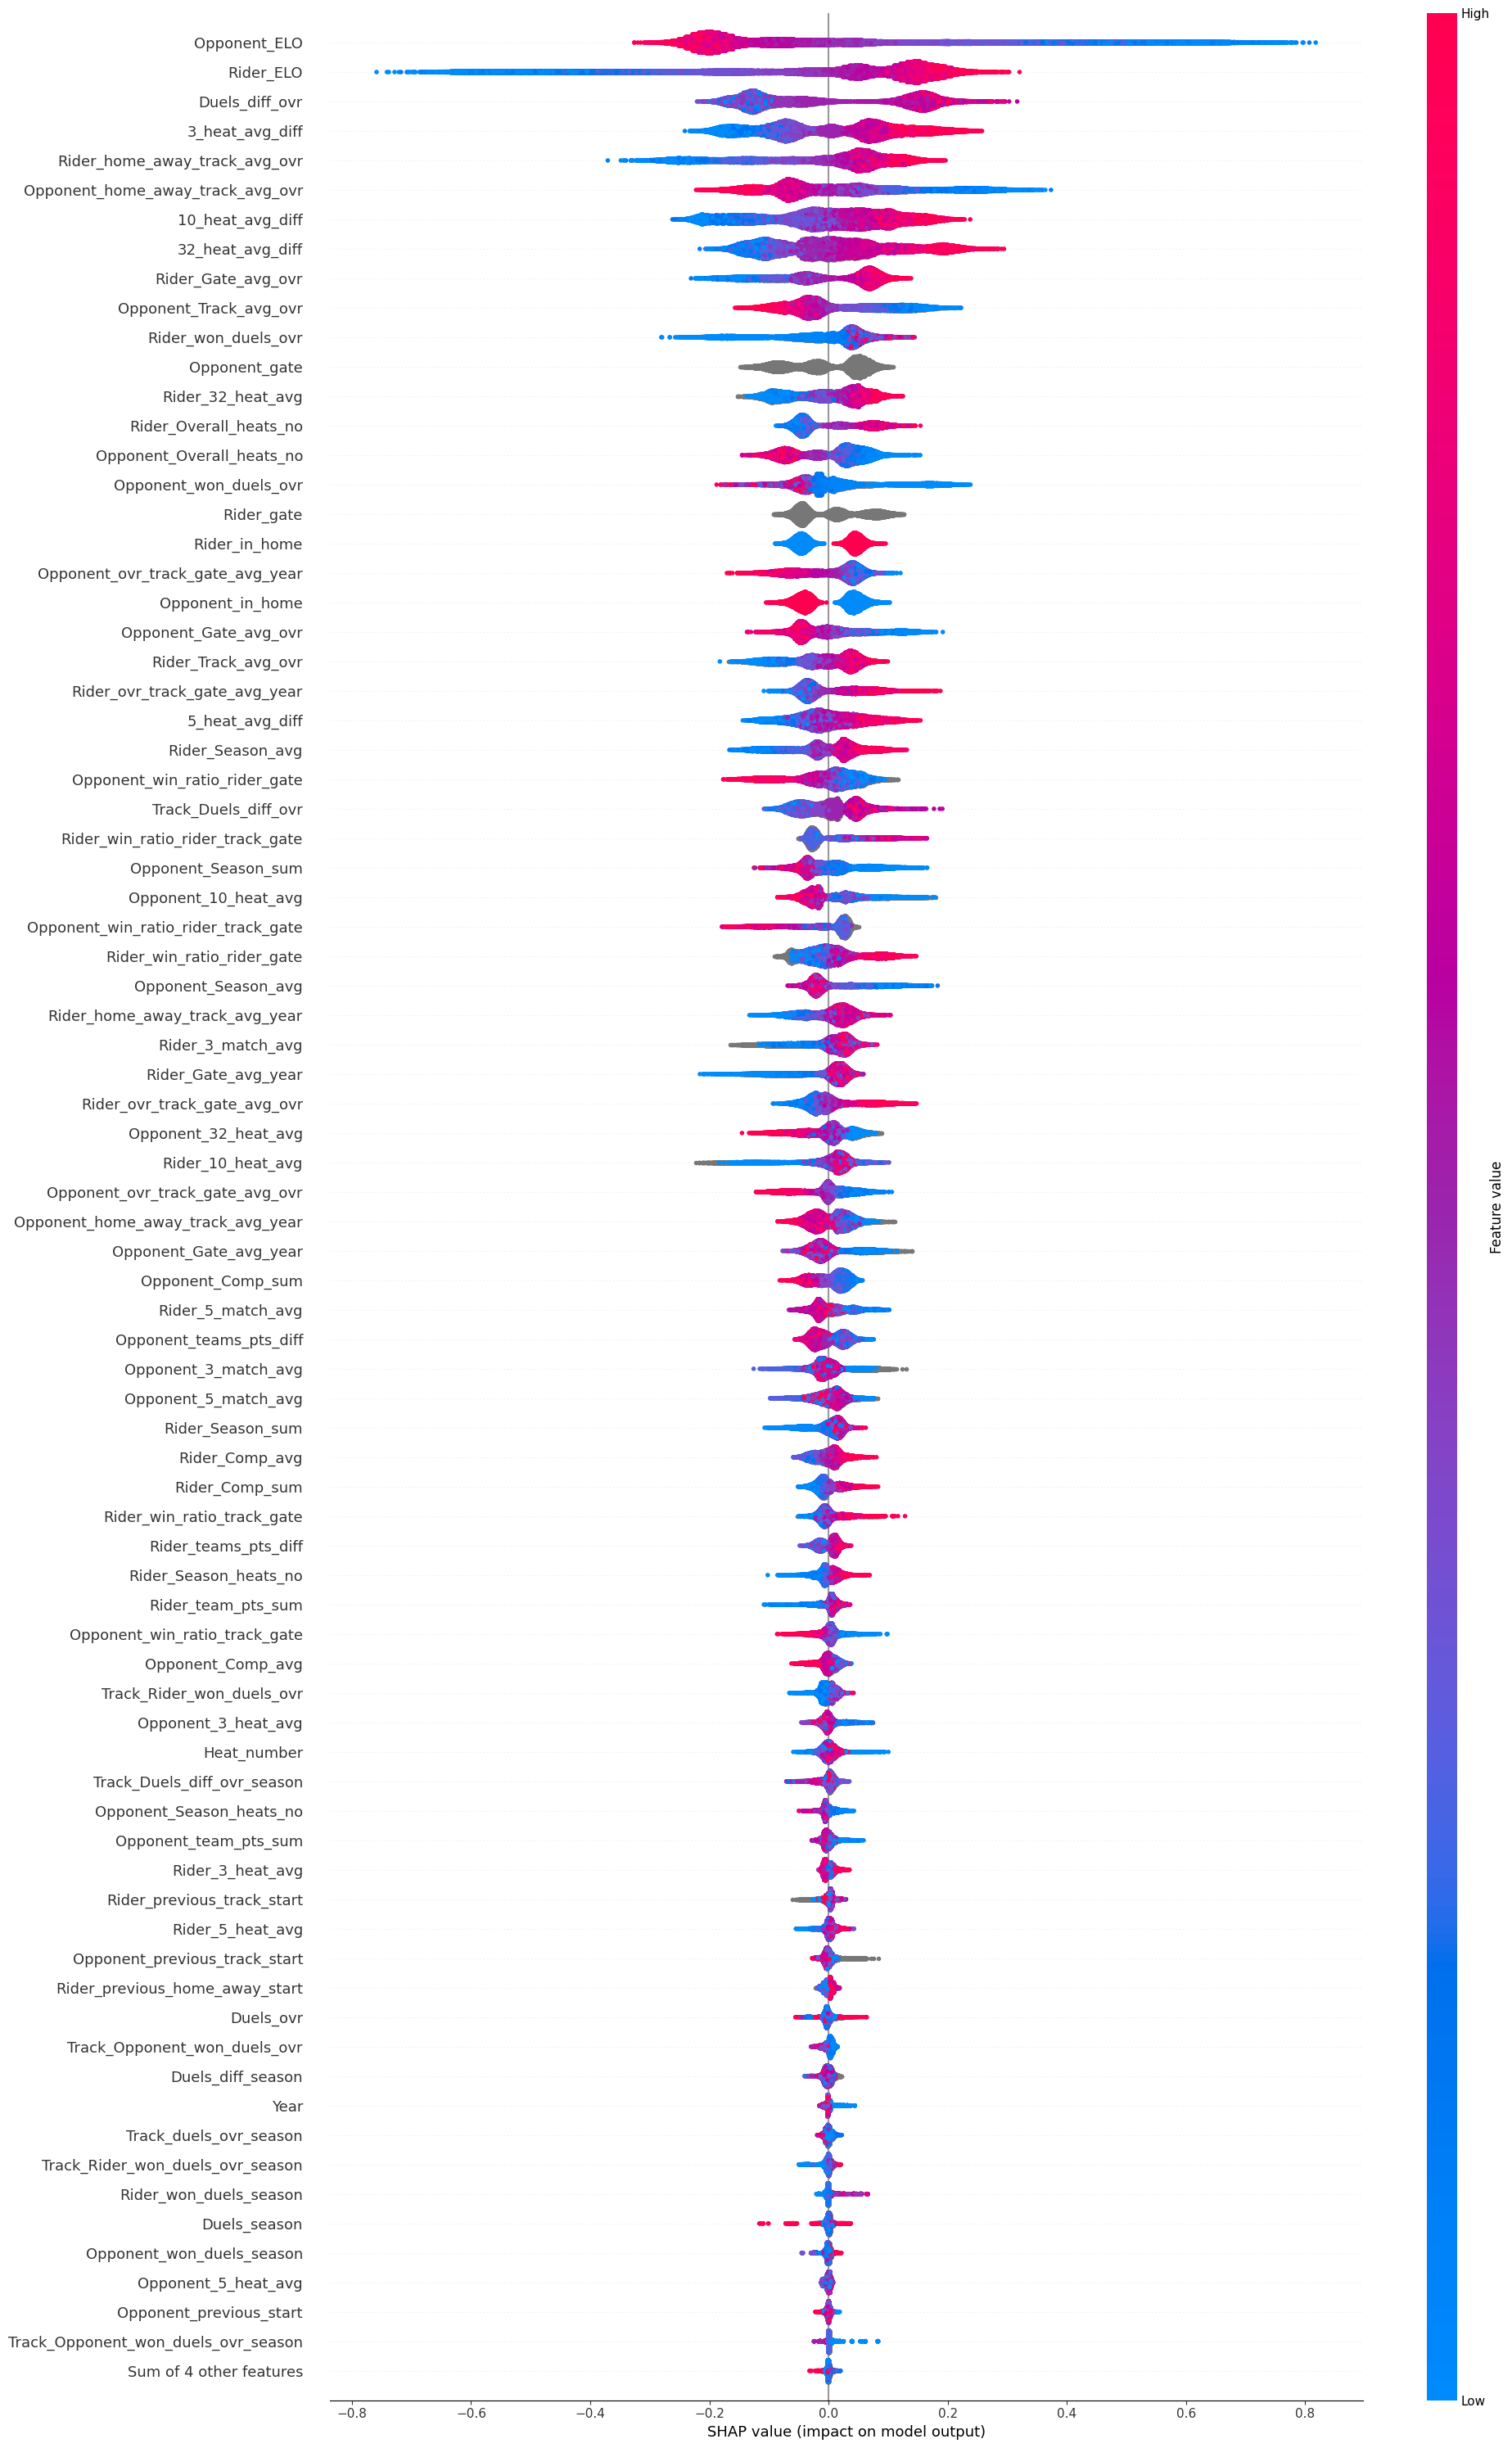

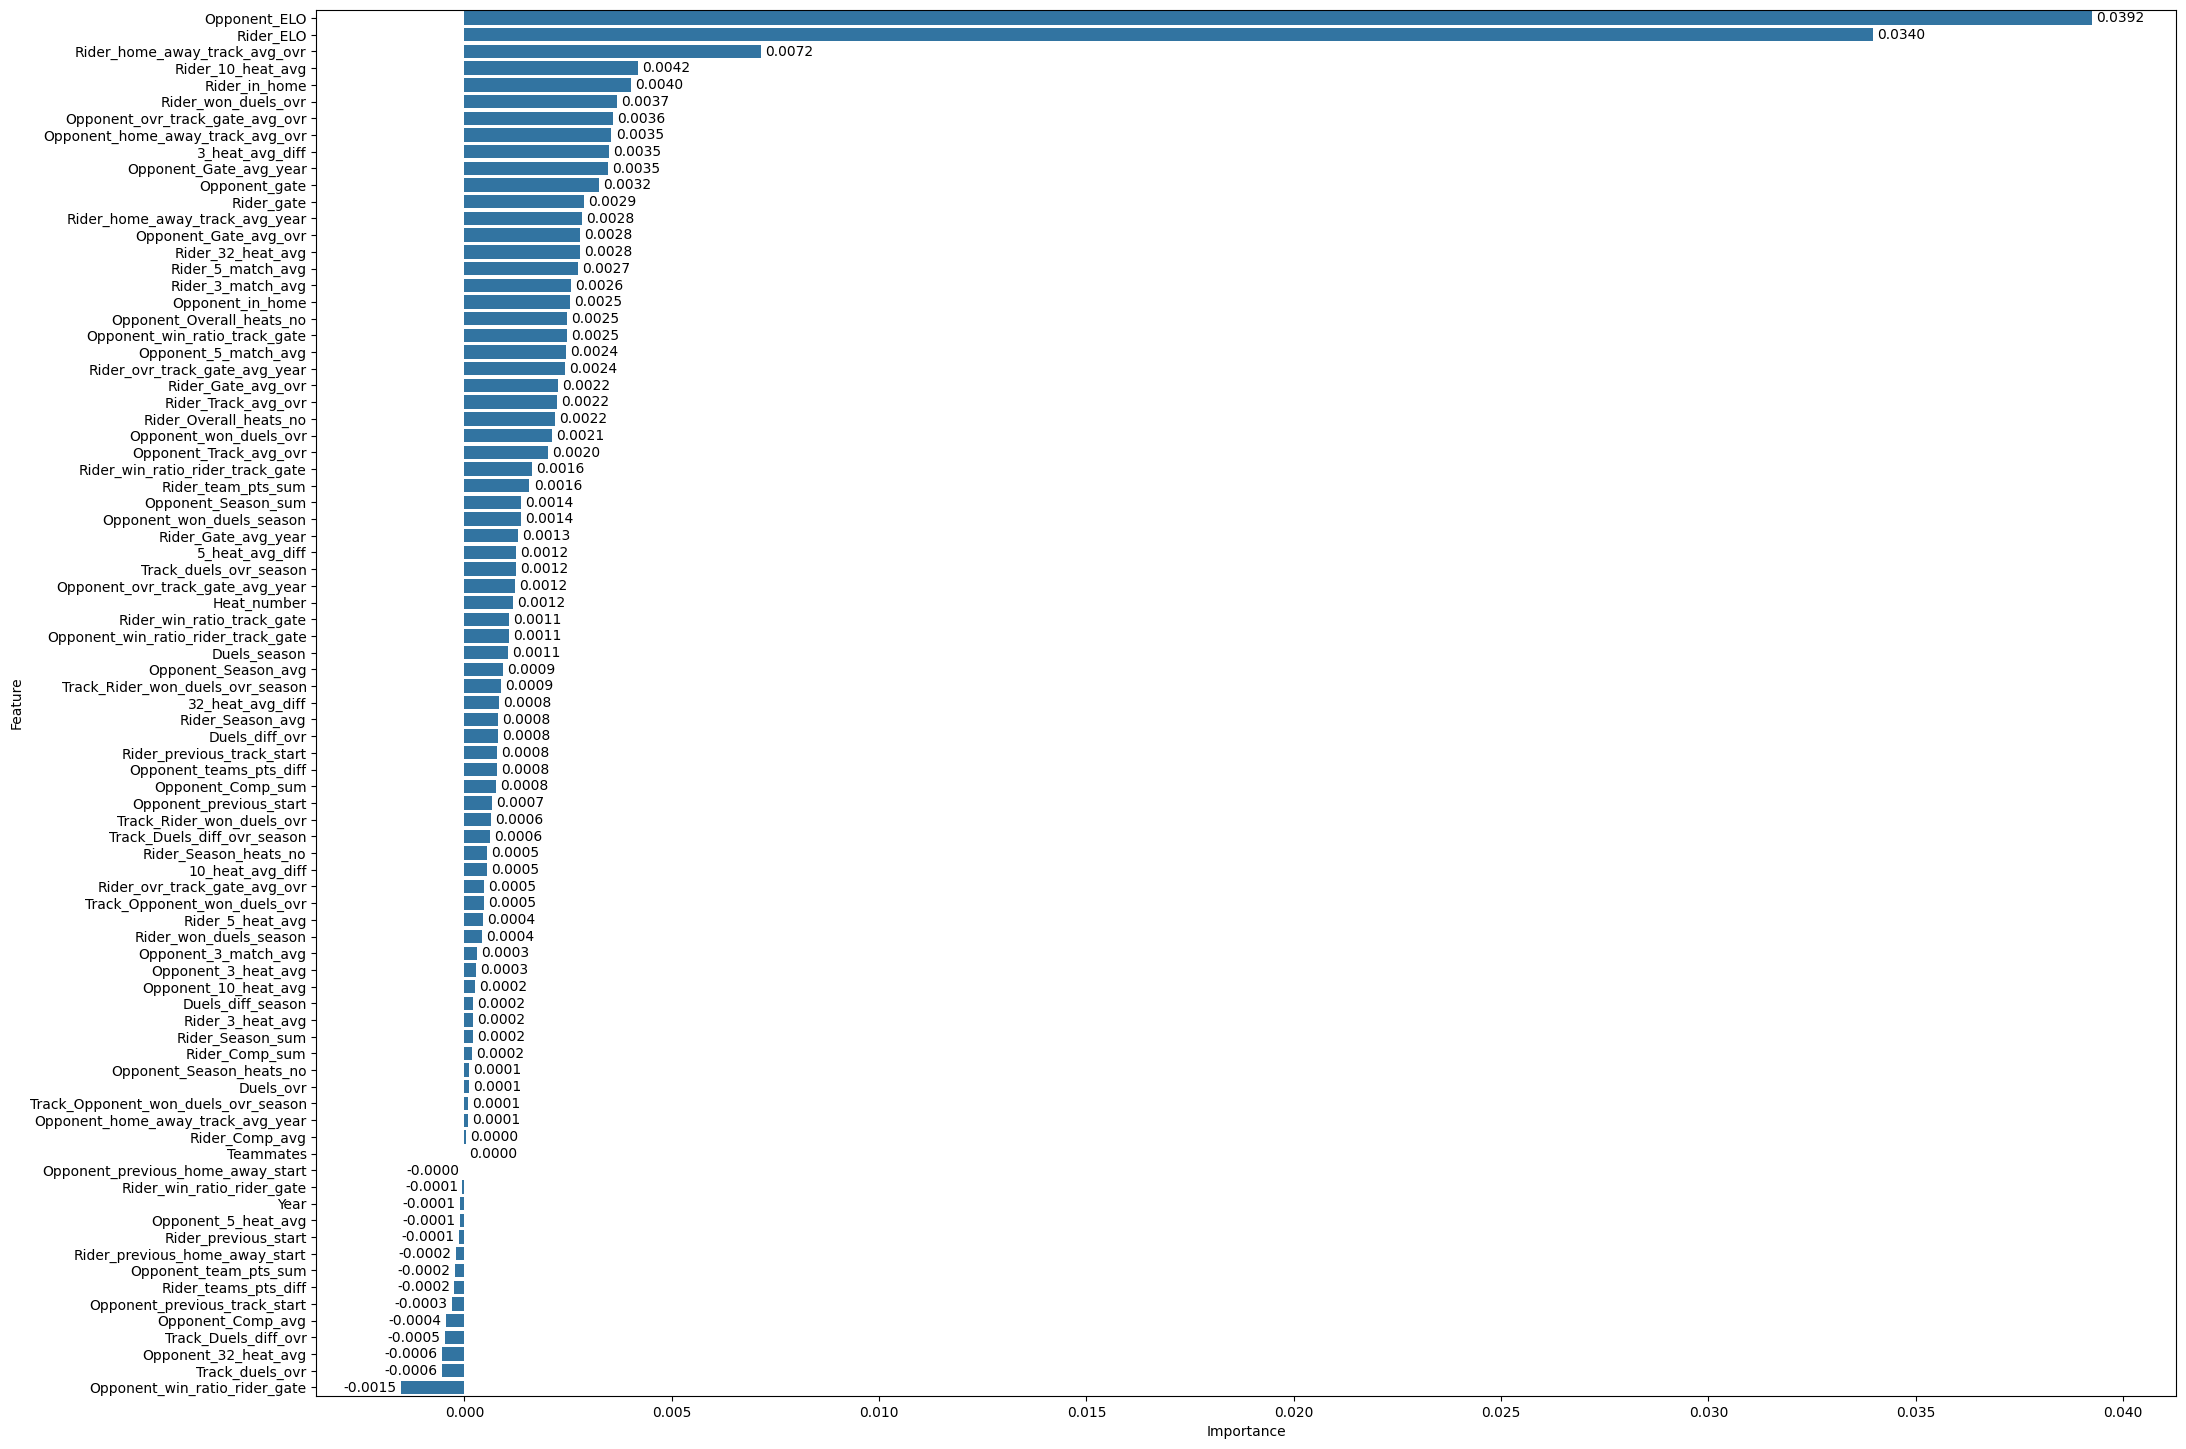

In [4]:
dataset['3_heat_avg_diff'] = dataset['Rider_3_heat_avg'] - dataset['Opponent_3_heat_avg']
dataset['5_heat_avg_diff'] = dataset['Rider_5_heat_avg'] - dataset['Opponent_5_heat_avg']
dataset['10_heat_avg_diff'] = dataset['Rider_10_heat_avg'] - dataset['Opponent_10_heat_avg']
dataset['32_heat_avg_diff'] = dataset['Rider_32_heat_avg'] - dataset['Opponent_32_heat_avg']

features = ['3_heat_avg_diff', 'Rider_3_heat_avg', 'Opponent_3_heat_avg', '5_heat_avg_diff', 'Rider_5_heat_avg', 'Opponent_5_heat_avg', '10_heat_avg_diff', 'Rider_10_heat_avg', 'Opponent_10_heat_avg', '32_heat_avg_diff', 'Rider_32_heat_avg', 'Opponent_32_heat_avg']
amended_dataset_test(dataset, features, 5)

Elapsed time: 1.15s
Classification accuracy (plain pairs): 68.280% (7971/11674)
Classification accuracy (summed pairs): 40.994% (1641/4003)
Classification accuracy: 42.218% (1690/4003)
Classification accuracy (with bonuses): 47.165% (1888/4003)


  0%|          | 0/200 [00:00<?, ?it/s]

[1, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x00000265D6C9AF60>, 0.7112386499914339, 0.4454159380464652, 0.49288033974519113]


  0%|          | 0/200 [00:00<?, ?it/s]

[2, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C3A5BE0>, 0.7095254411512764, 0.44216837371971024, 0.48913315013739694]


  0%|          | 0/200 [00:00<?, ?it/s]

[3, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C6846B0>, 0.7102107246873394, 0.4466650012490632, 0.4921309018236323]
0.49288033974519113
Creating explainer...
Proceeding to dependencies...
Proceeding to plotting...
Creating 1/3 batch of plots...


C:\Users\Piotr\PycharmProjects\SpeedwayHub\venv\Lib\site-packages\shap\plots\_scatter.py:449: RuntimeWarning: invalid value encountered in greater
  min_dist = np.min(diffs[diffs > 1e-8])
C:\Users\Piotr\PycharmProjects\SpeedwayHub\venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Creating 2/3 batch of plots...
Creating 3/3 batch of plots...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dp.show()


Proceeding to importance metrics...
Proceeding to shap summary...
Proceeding to permutations...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.importances_heatmap.show()
C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.permutation_importance.show()


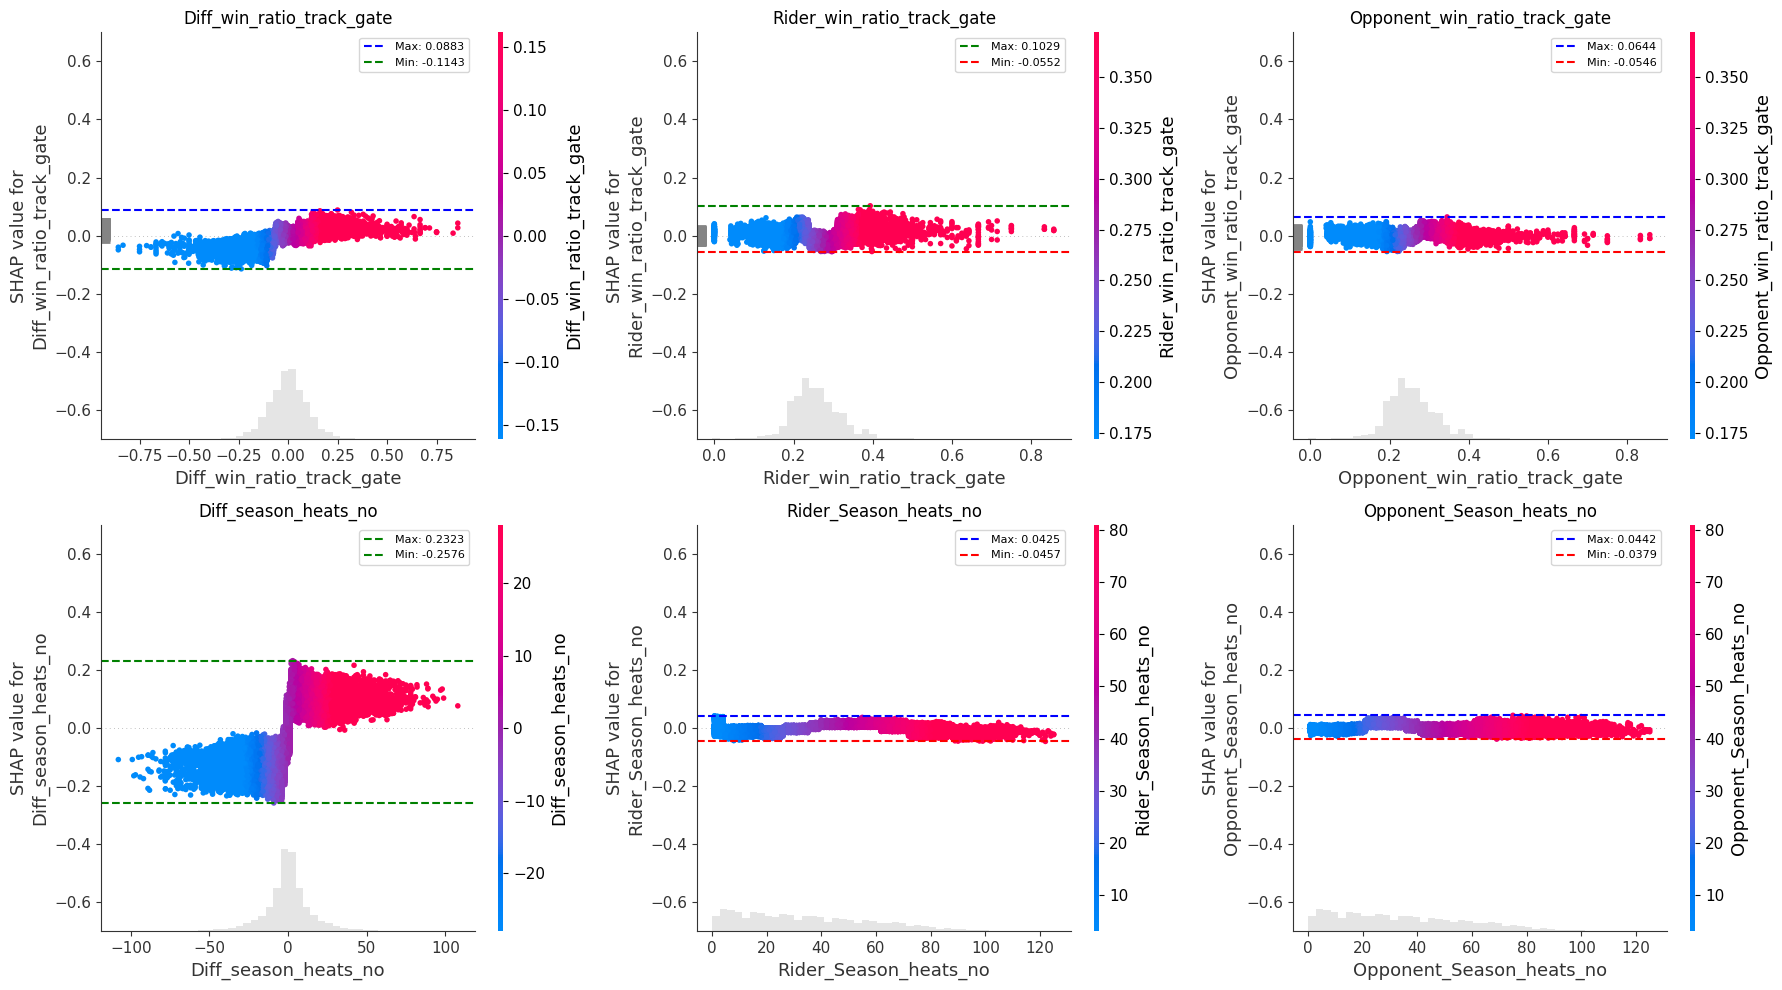

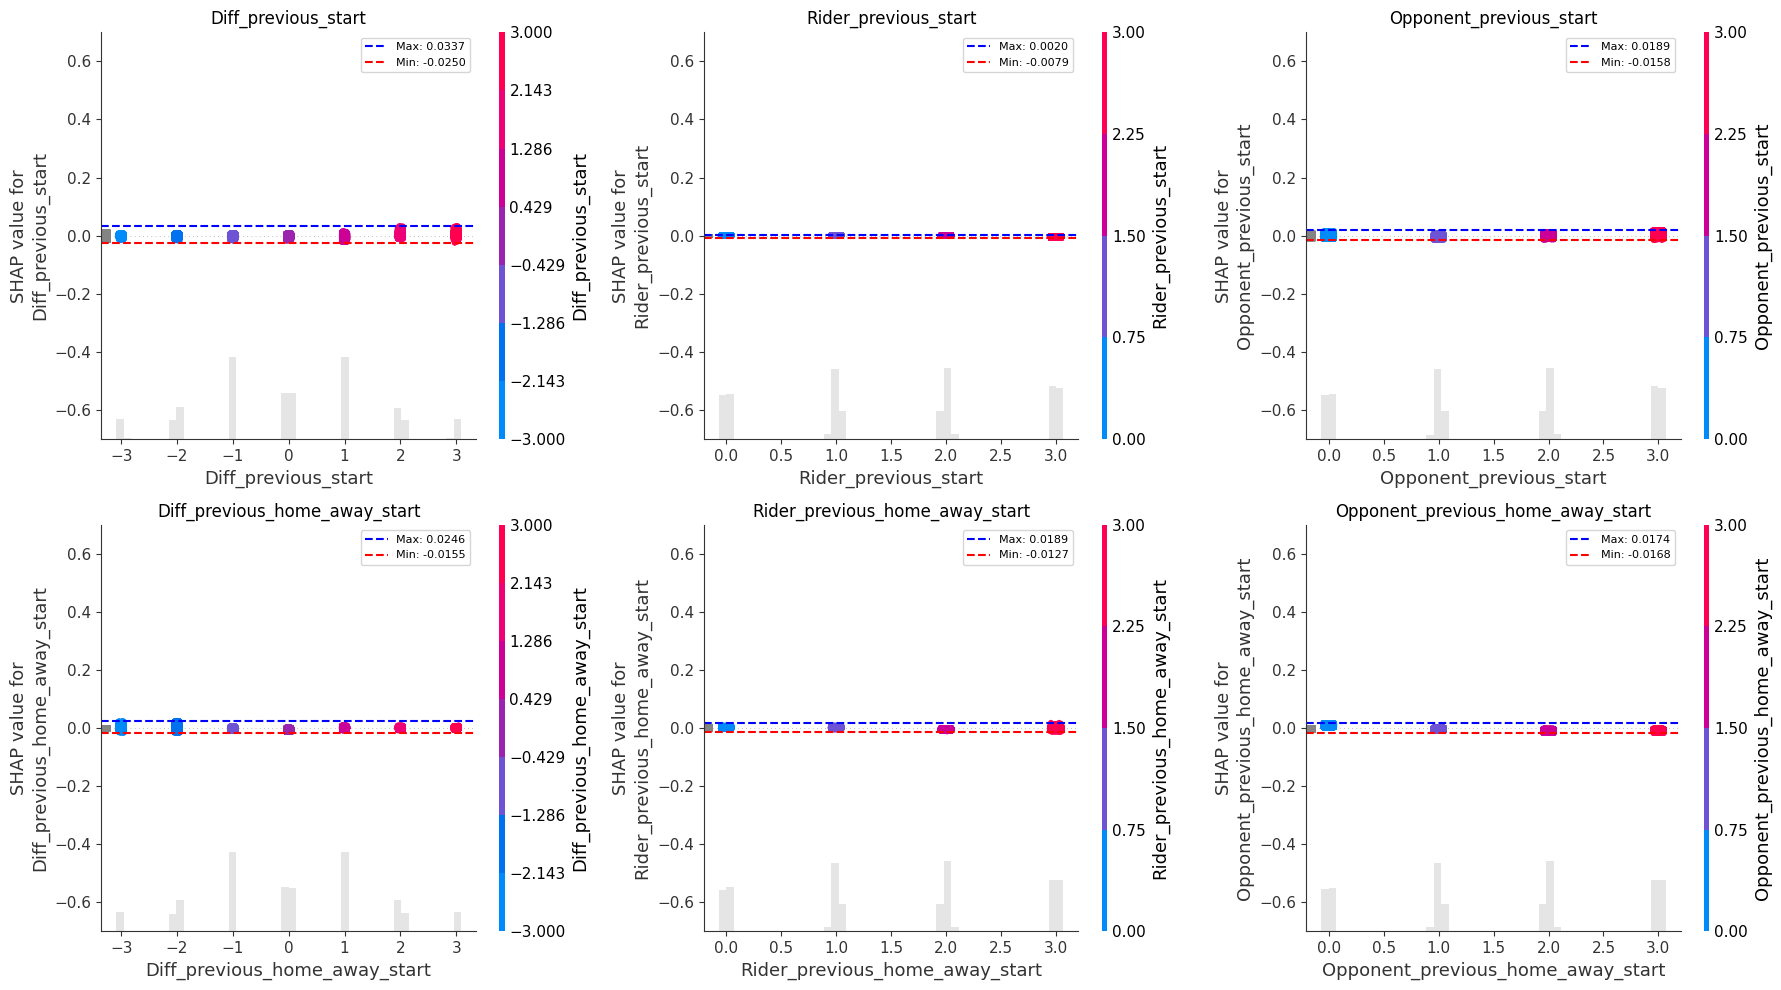

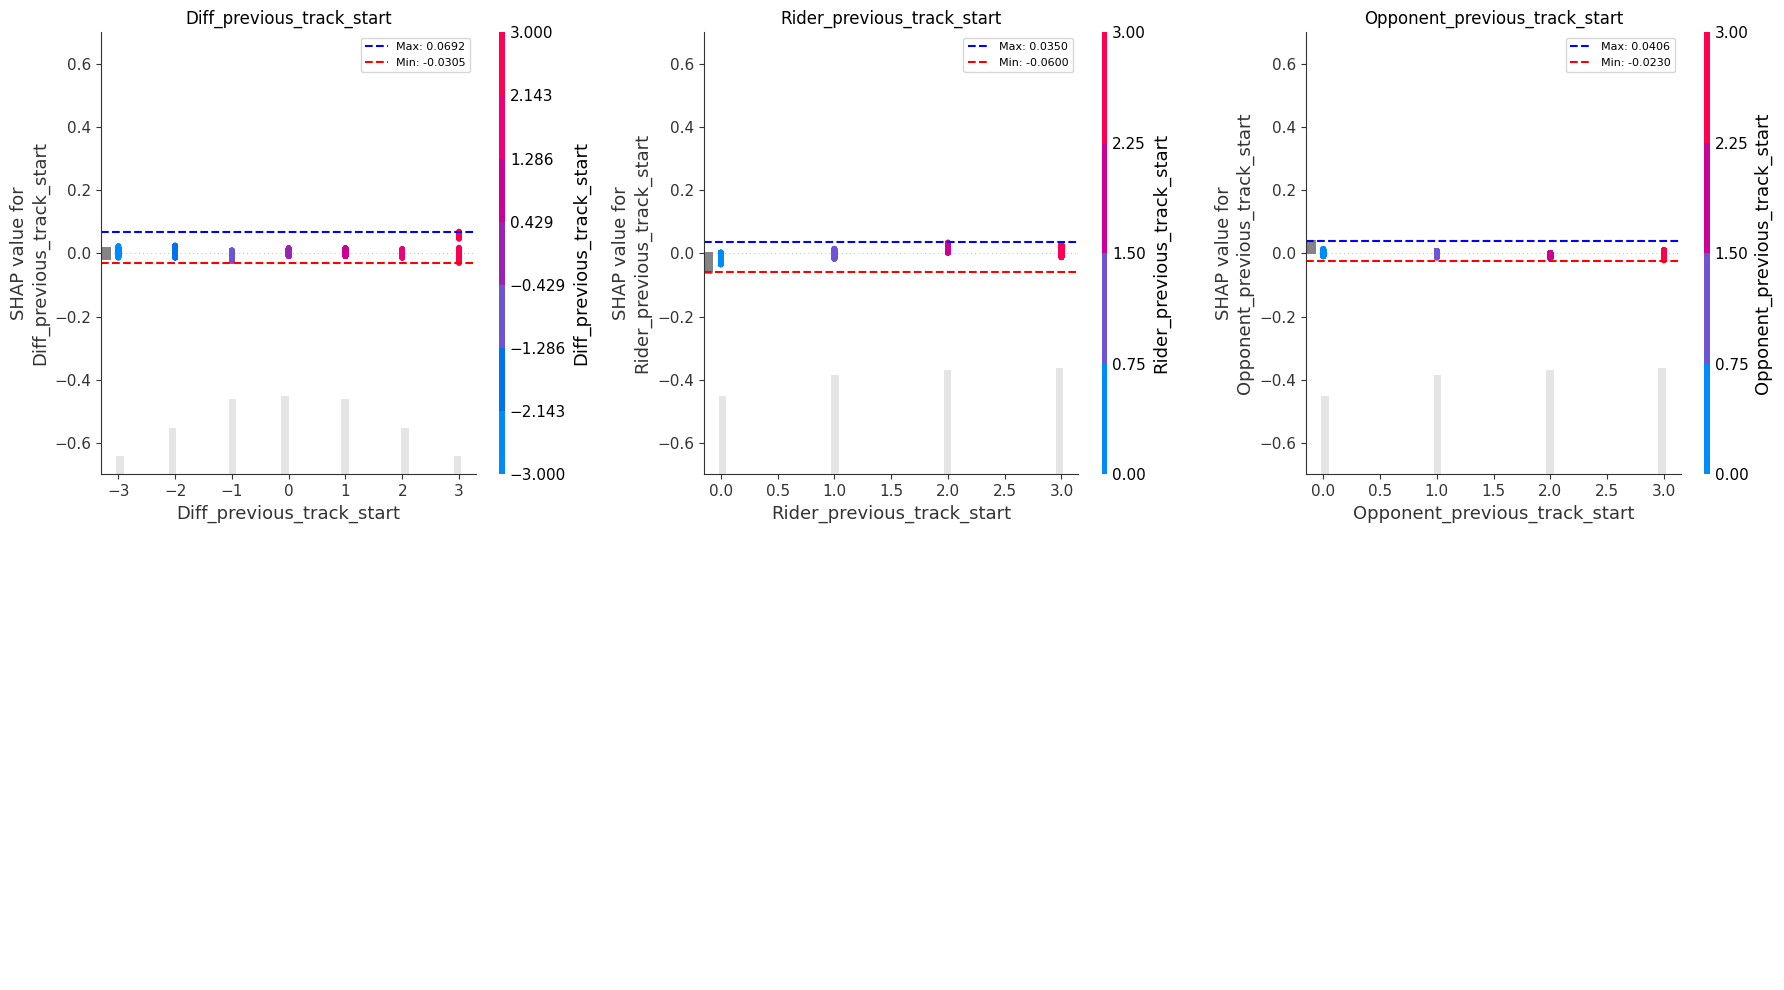

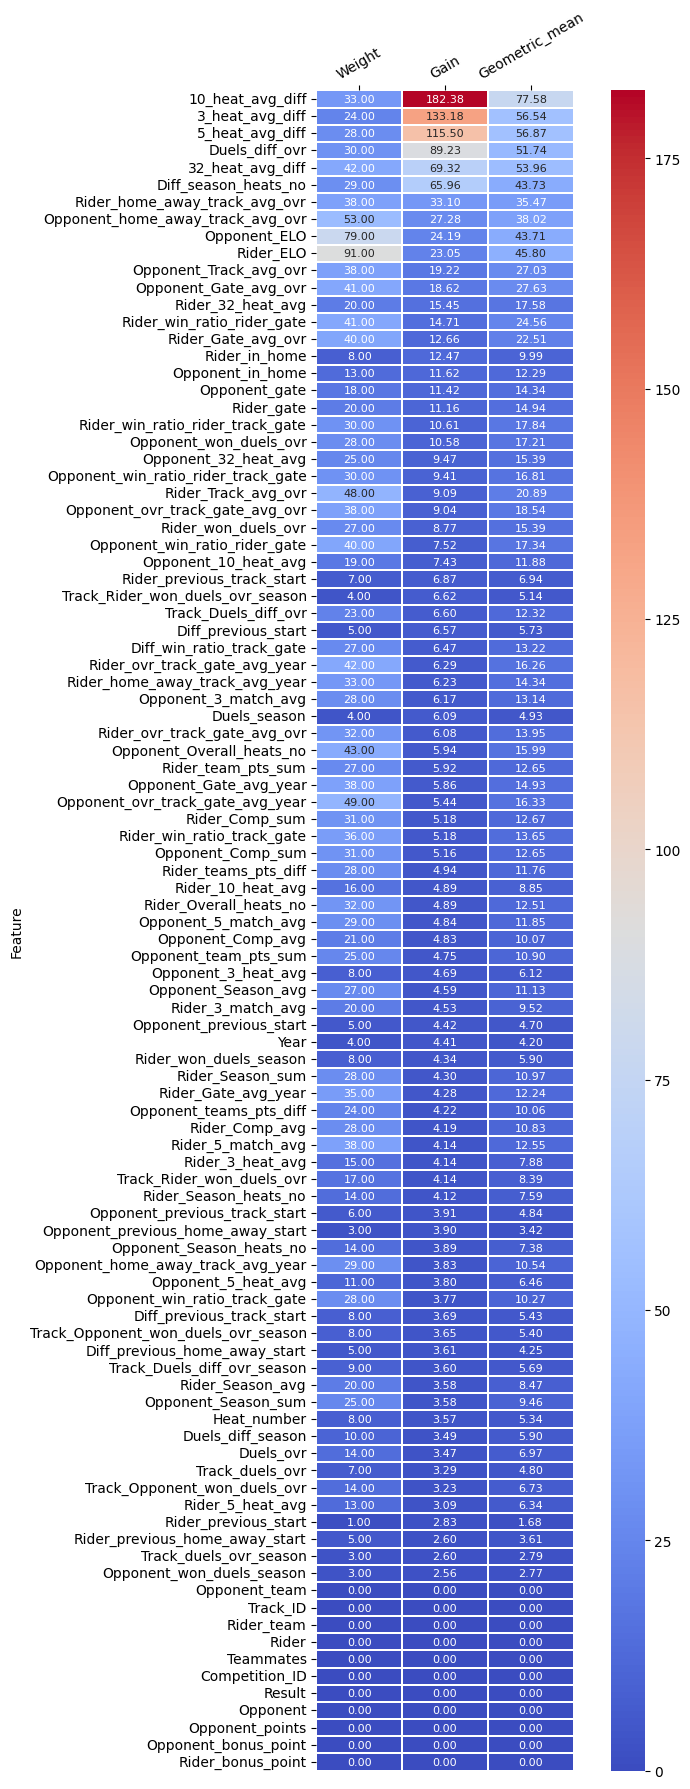

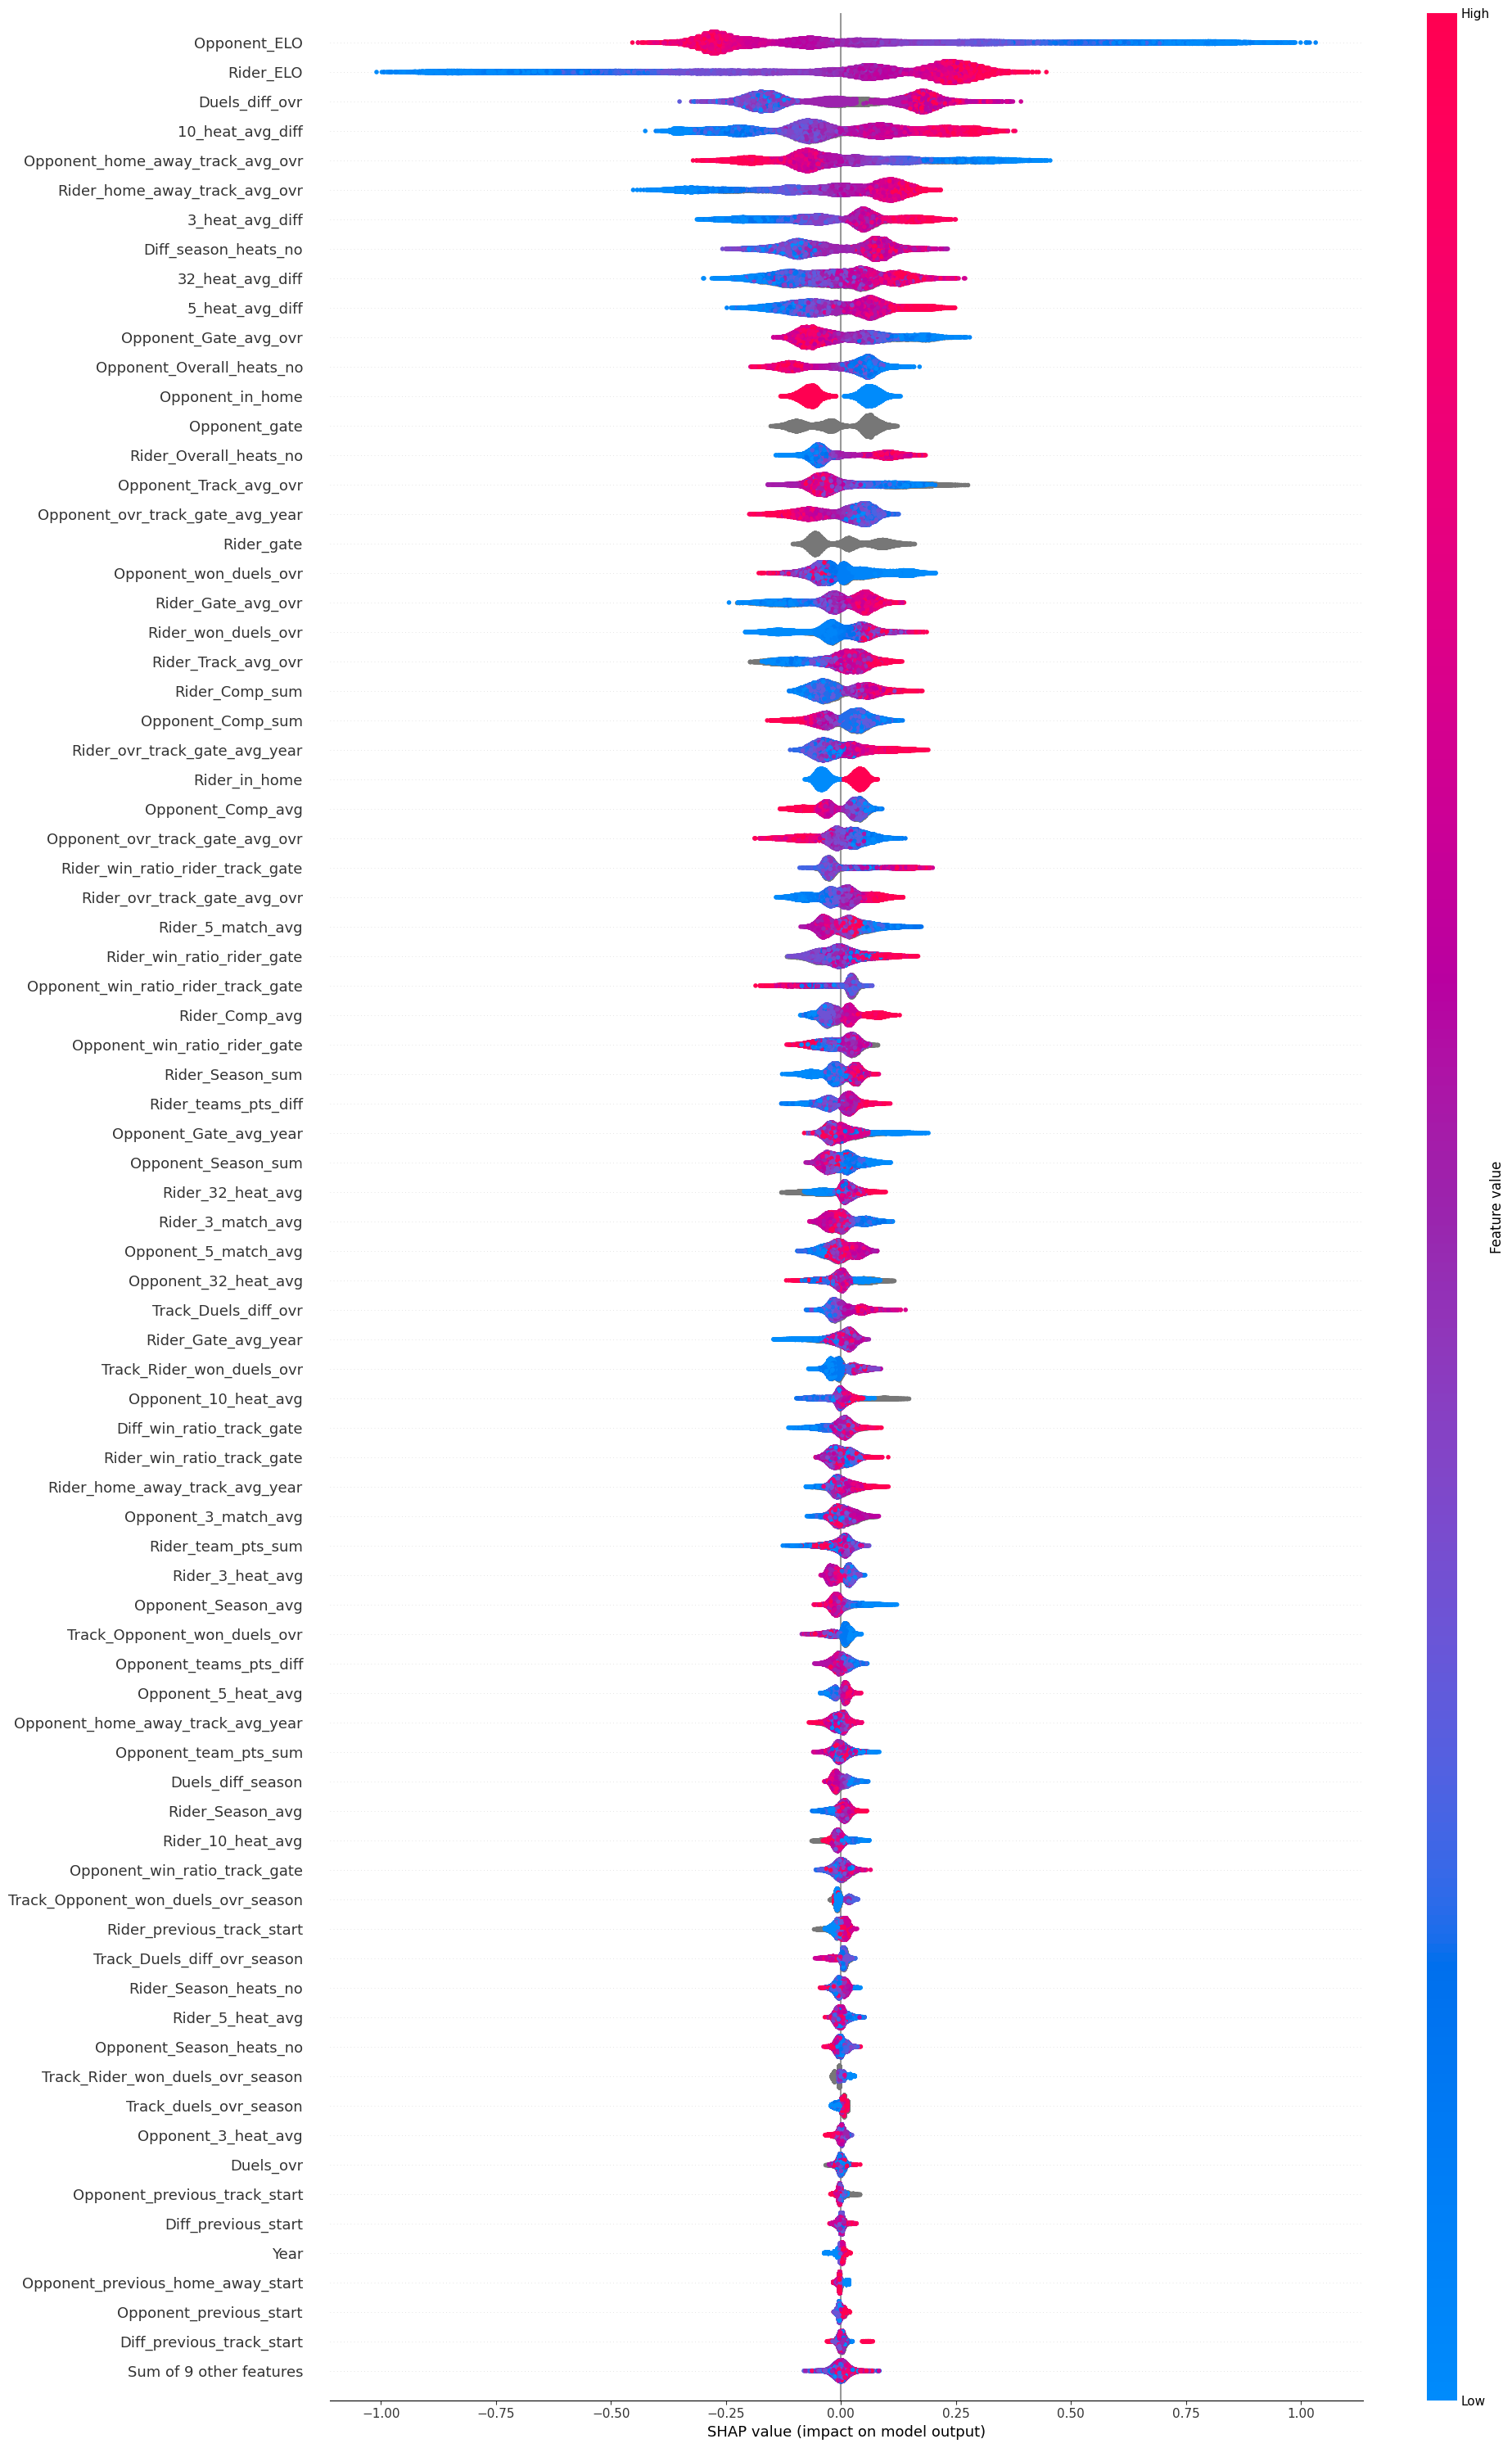

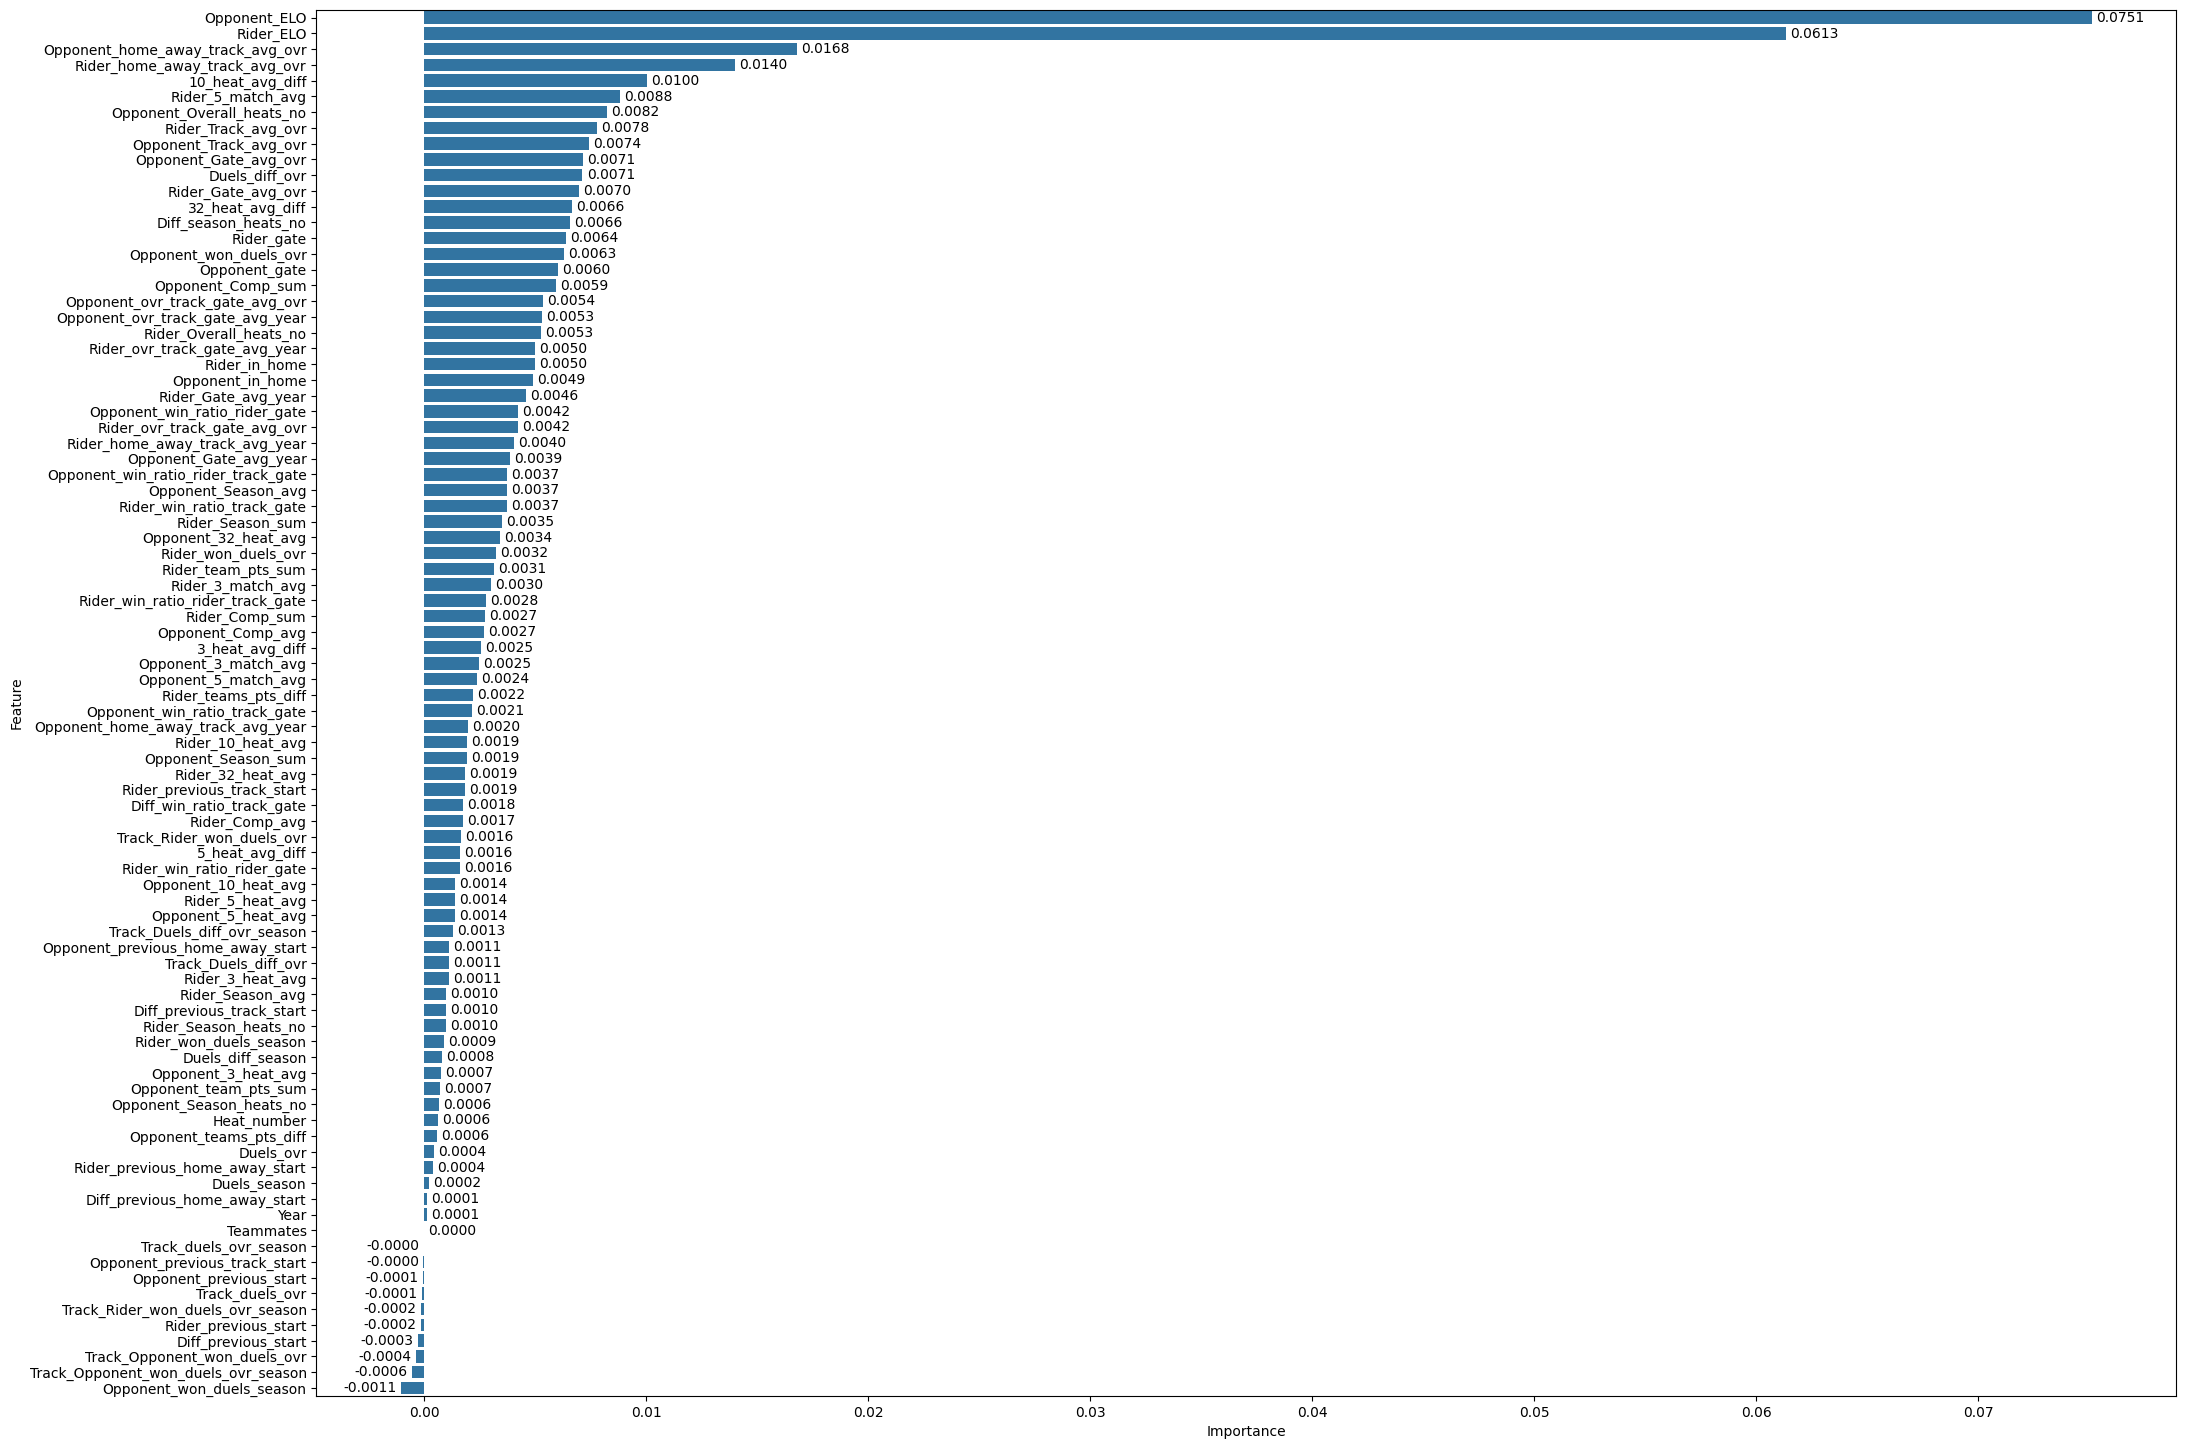

In [7]:
dataset['Diff_win_ratio_track_gate'] = dataset['Rider_win_ratio_track_gate'] - dataset['Opponent_win_ratio_track_gate']
dataset['Diff_season_heats_no'] = dataset['Rider_Season_heats_no'] - dataset['Opponent_Season_heats_no']
dataset['Diff_previous_start'] = dataset['Rider_previous_start'] - dataset['Opponent_previous_start']
dataset['Diff_previous_home_away_start'] = dataset['Rider_previous_home_away_start'] - dataset['Opponent_previous_home_away_start']
dataset['Diff_previous_track_start'] = dataset['Rider_previous_track_start'] - dataset['Opponent_previous_track_start']

features = ['Diff_win_ratio_track_gate', 'Rider_win_ratio_track_gate', 'Opponent_win_ratio_track_gate', 
            'Diff_season_heats_no', 'Rider_Season_heats_no', 'Opponent_Season_heats_no',
            'Diff_previous_start', 'Rider_previous_start', 'Opponent_previous_start', 
            'Diff_previous_home_away_start', 'Rider_previous_home_away_start', 'Opponent_previous_home_away_start',
            'Diff_previous_track_start', 'Rider_previous_track_start', 'Opponent_previous_track_start']

amended_dataset_test(dataset, features, 3)            

In [16]:
columns_to_drop = ['Teammates', 'Diff_previous_track_start', 'Rider_previous_track_start', 'Opponent_previous_track_start',
                   'Diff_previous_home_away_start', 'Rider_previous_home_away_start', 'Opponent_previous_home_away_start',
                   'Diff_previous_start', 'Rider_previous_start', 'Opponent_previous_start', 
                   'Rider_Season_heats_no', 'Opponent_Season_heats_no', 'Rider_win_ratio_track_gate', 'Opponent_win_ratio_track_gate',
                   'Rider_3_heat_avg', 'Opponent_3_heat_avg', '5_heat_avg_diff', 'Rider_5_heat_avg', 'Opponent_5_heat_avg',
                   'Track_Duels_diff_ovr', 'Track_duels_ovr', 'Track_Rider_won_duels_ovr', 'Track_Opponent_won_duels_ovr', 
                   'Track_Duels_diff_ovr_season', 'Track_duels_ovr_season', 'Track_Rider_won_duels_ovr_season', 'Track_Opponent_won_duels_ovr_season', 
                   'Duels_diff_season', 'Duels_season', 'Rider_won_duels_season', 'Opponent_won_duels_season']
print(len(columns_to_drop), len(dataset.columns.values.tolist()))

31 67


In [17]:
dataset = pd.read_parquet(f"../../../../Dataset/Datasets/{PAIRS_DATASET}")
dataset['3_heat_avg_diff'] = dataset['Rider_3_heat_avg'] - dataset['Opponent_3_heat_avg']
dataset['5_heat_avg_diff'] = dataset['Rider_5_heat_avg'] - dataset['Opponent_5_heat_avg']
dataset['10_heat_avg_diff'] = dataset['Rider_10_heat_avg'] - dataset['Opponent_10_heat_avg']
dataset['32_heat_avg_diff'] = dataset['Rider_32_heat_avg'] - dataset['Opponent_32_heat_avg']
dataset['Diff_win_ratio_track_gate'] = dataset['Rider_win_ratio_track_gate'] - dataset['Opponent_win_ratio_track_gate']
dataset['Diff_season_heats_no'] = dataset['Rider_Season_heats_no'] - dataset['Opponent_Season_heats_no']
dataset['Diff_previous_start'] = dataset['Rider_previous_start'] - dataset['Opponent_previous_start']
dataset['Diff_previous_home_away_start'] = dataset['Rider_previous_home_away_start'] - dataset['Opponent_previous_home_away_start']
dataset['Diff_previous_track_start'] = dataset['Rider_previous_track_start'] - dataset['Opponent_previous_track_start']
dataset.drop(columns_to_drop, axis=1, inplace=True)
print(len(dataset.columns.values.tolist()))

68


Elapsed time: 0.98s
Classification accuracy (plain pairs): 67.766% (7911/11674)
Classification accuracy (summed pairs): 42.118% (1686/4003)
Classification accuracy: 43.093% (1725/4003)
Classification accuracy (with bonuses): 47.140% (1887/4003)


  0%|          | 0/200 [00:00<?, ?it/s]

[1, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x00000265EDDF13D0>, 0.7086688367311975, 0.447414439170622, 0.49288033974519113]


  0%|          | 0/200 [00:00<?, ?it/s]

[2, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x0000026588049A30>, 0.7090114784992291, 0.4431676242817887, 0.4926305271046715]


  0%|          | 0/200 [00:00<?, ?it/s]

[3, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x000002658C43D4C0>, 0.7103820455713552, 0.44091931051711214, 0.48638521109168126]


  0%|          | 0/200 [00:00<?, ?it/s]

[4, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x00000265B0A97A70>, 0.7094397807092685, 0.44066949787659254, 0.4876342742942793]


  0%|          | 0/200 [00:00<?, ?it/s]

[5, <Models.Pairs.Hyperparameters.optuna_hyperparameters.OptunaXgboost object at 0x00000265D6C9A210>, 0.7094397807092685, 0.43842118411191605, 0.485885585810642]
0.49288033974519113
Creating explainer...
Proceeding to dependencies...
Proceeding to plotting...
Proceeding to importance metrics...
Proceeding to shap summary...
Proceeding to permutations...


C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.importances_heatmap.show()
C:\Users\Piotr\AppData\Local\Temp\ipykernel_22636\3028464237.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_explainer.permutation_importance.show()


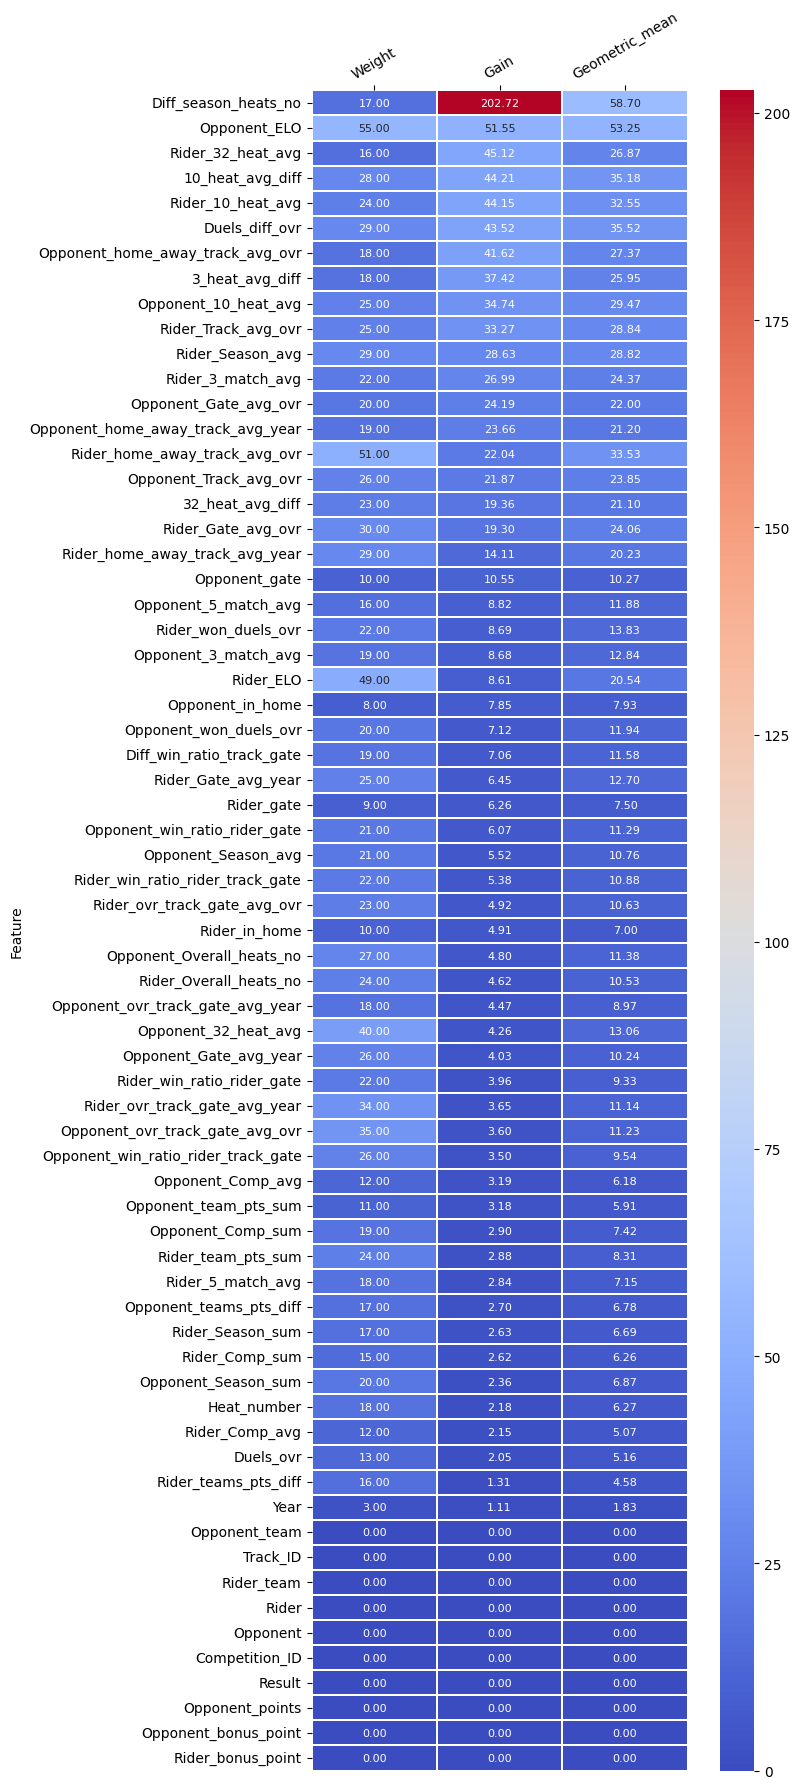

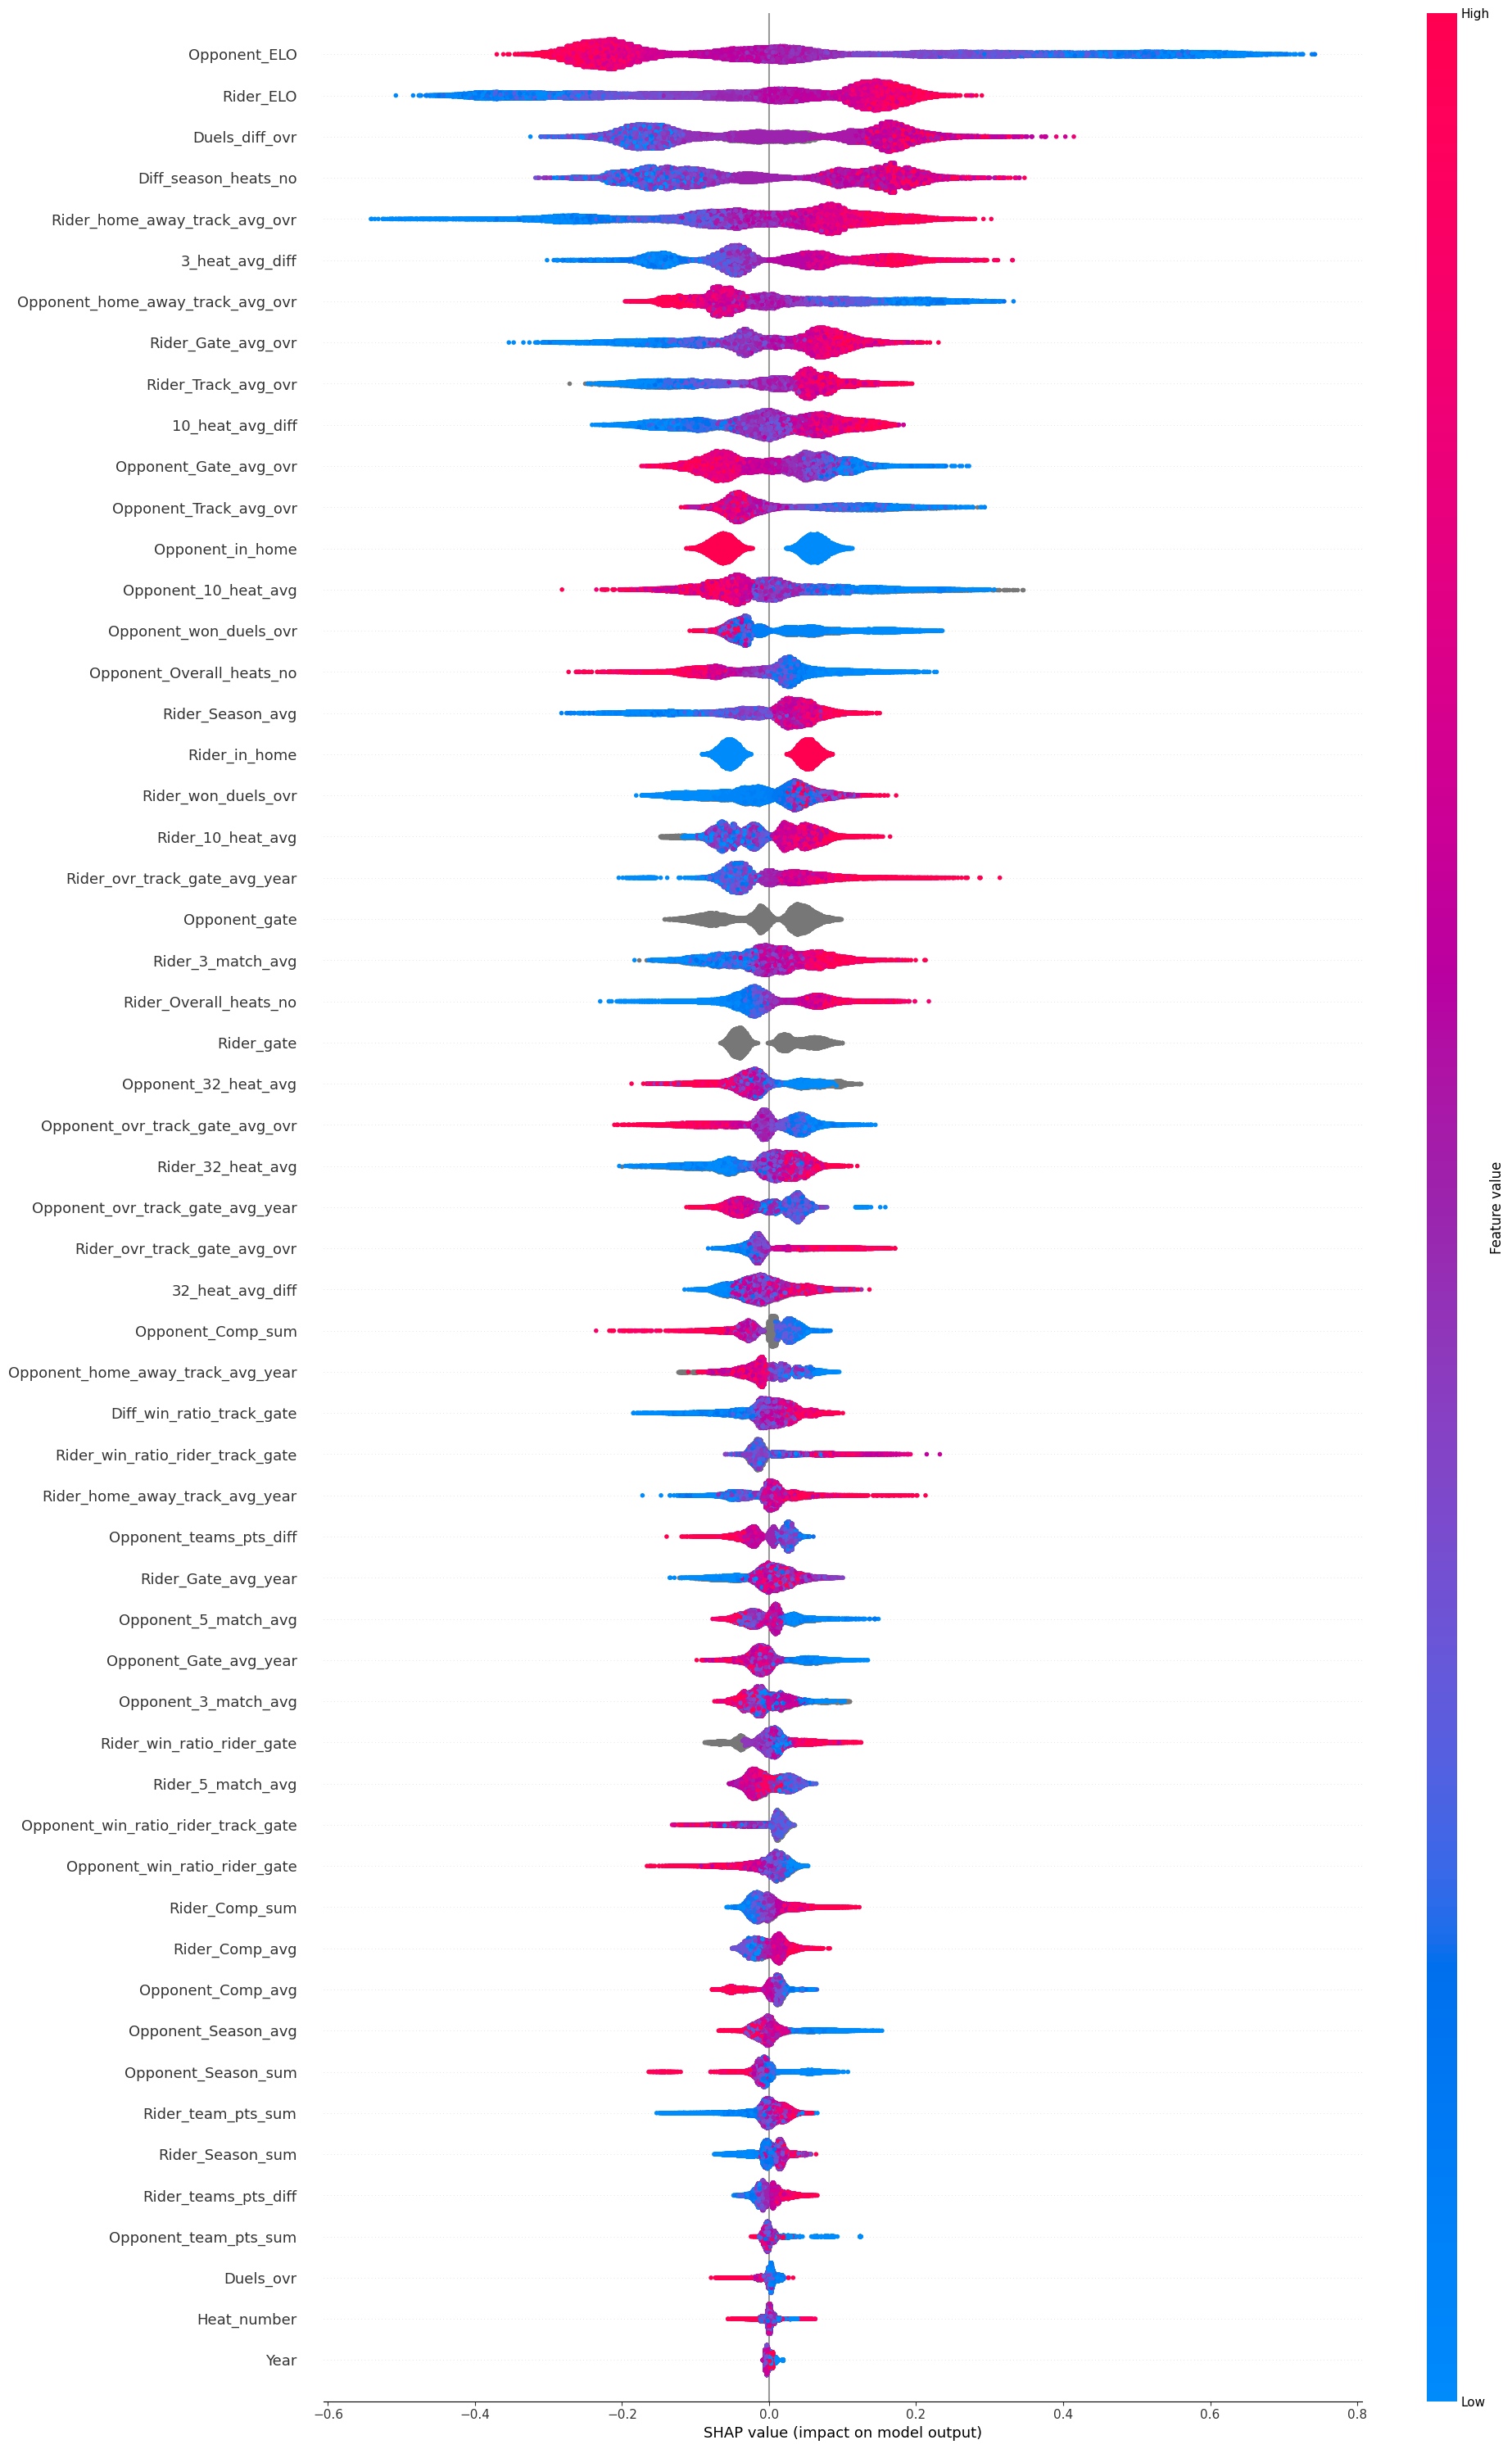

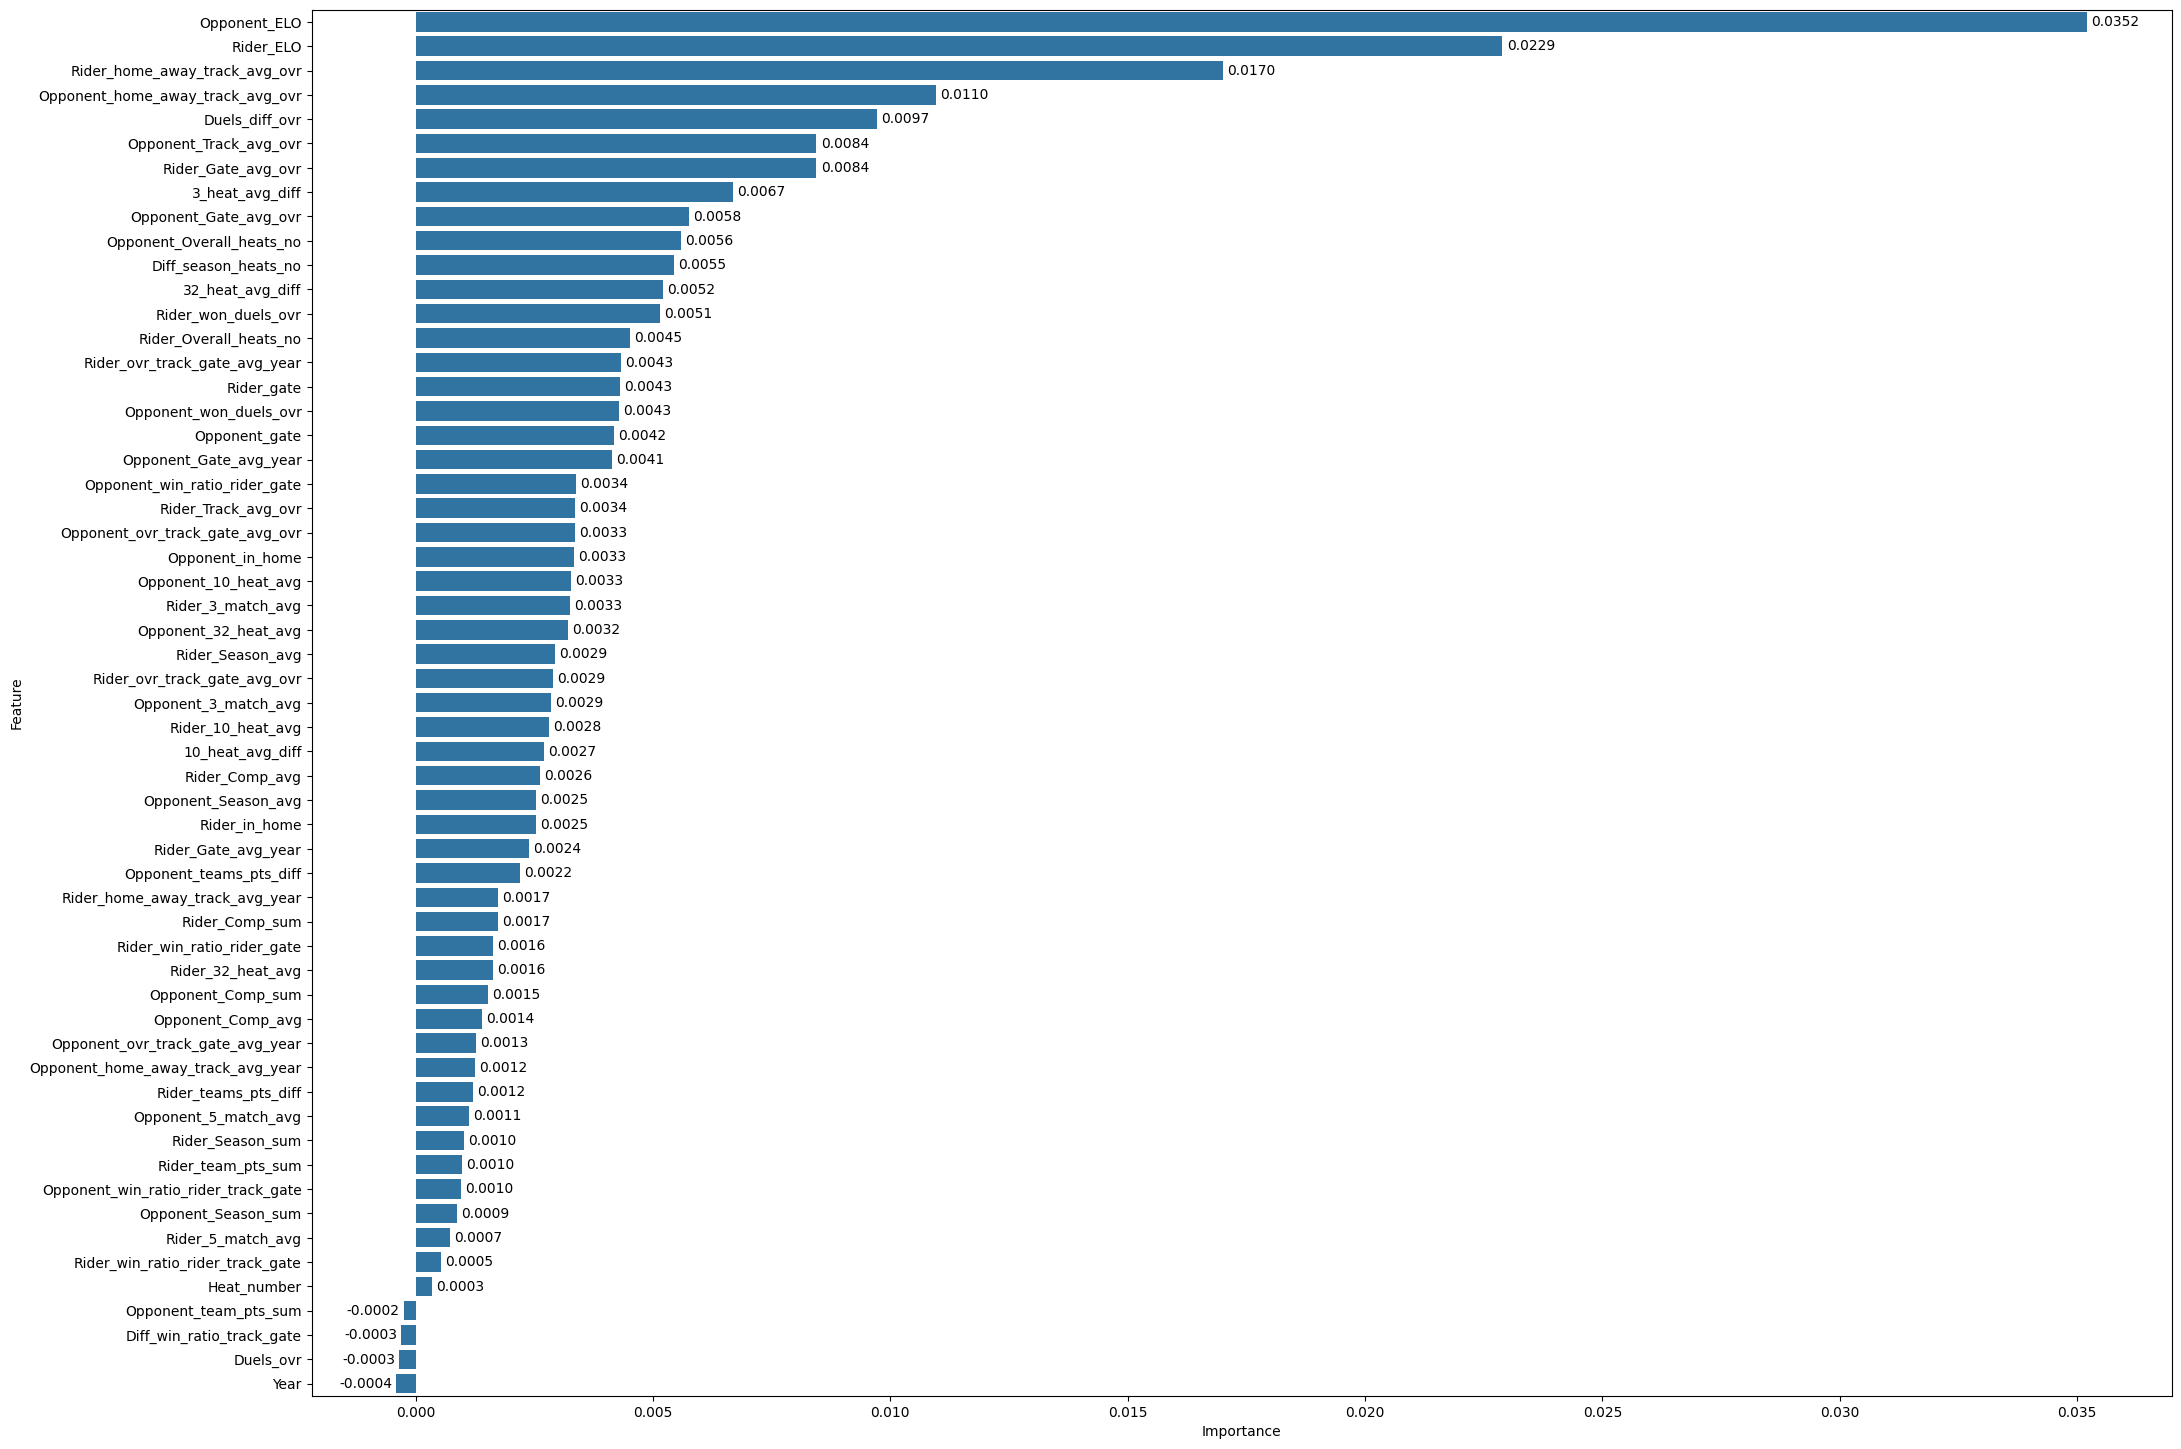

In [18]:
amended_dataset_test(dataset, [], 5)